# AirBnB data project
The project will be divided into several parts:
- 1 Business Understanding
- 2 Data Understanding
- 3 Data Preparation
- 4 Modeling
- 5 Evaluation
- 6 Deploy



## 1 Business Understanding
Host always wants to earn more money

Airbnb always intrigued me. The company uses a crowdsourcing model to 'replace' hotel and provide hosts' properties to travelers in need. Of course, using this model, the traveling cost becomes significantly cheaper since they are no longer required to pay fees such as service charge.
 ###  房屋经营者如何挣更多的钱？
 +   一年当中，那个时间是淡季、那些时间是旺季，价格如何变化？
     + 同区域、同类型房子，价格在一年中如何变化？
 +   在淡季，提高入住率。
     + 如何提高入住率？
     + 入住率和那些因素有关？
         + What prompt us to choose your property within the huge listing at Airbnb?
         + Is reviews helpful for choosing airbnb?
         + 点评分数和入住率有关吗？
         + 点评分数和那些因素有关？
 +   在旺季，更高的价格
     + 旺季，游客更关注什么？
     + 不关注的地方，是否可以节省可变成本？

## 2 Data Understanding
It includes the following steps:
  -  Data gethering
  -  Data assessment

In order to get a better understanding of the data I will be looking at throughout this project, I will check the characteristics of the dataset. First, let's read in the data and necessary libraries.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
#from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline


### 2.1 Data Gethering
Kaggle provides the Airbnb Seattle datasets, I download them for the analysis.

In [2]:
calendar = pd.read_csv("./seattle/calendar.csv")
listings = pd.read_csv("./seattle/listings.csv")
reviews = pd.read_csv("./seattle/reviews.csv")

### 2.2 Data assessment
  1. Get the number of rows and columns in this dataset.
      - 1) Get the shape 
      - 2) Get the data type and memory use
      - 3) Get rows example 
  2. Assess missing values distribution
      - 1) Get missing values distribution of columns/rows
      - 2) Get a set of column names that have no missing values.
      - 3) Get a set of column names that have more than target percents(e.g. 40%) if their values missing.
      - 4) Get a set of column names that have less than target percents if their values missing. They need to be imputed.
  3. Assess unique value for column. if it is unique value, the column can be removed.
  4. classify by actions : Get drop or imputation actions list based on classification after get colums list with unique vlaue. Get the following lists:
      - 1) drop columns list
      - 2) fullfill columns list
      - 3) imputation columns list
  4. Assess values distribution for object type.
      - 1) Check non-numeric columns
      - 2) Select columns to inspect further if columns are unclear in step 1.


In [3]:
def get_base_info(df):
    """
     The function is created to get the number of rows and columns in this dataset.
      - 1) Get the shape 
      - 2) Get the data type and memory use
      - 3) Get the rows example 
     Input:
        df: Dataframe, dataset 
     Return:
        NA
    """
    #Get the shape
    rows_num, columns_num=df.shape
    print( "The dataset contains {} rows and {} columns\n".format( rows_num,columns_num))
    
    #Get the data type and memory use
    if type(calendar) != pd.DataFrame:
        print("It is {},not a DataFrame. exit!".format(type(df)))
        return
    # Show all columns
    original_max_rows_setting= pd.options.display.max_rows
    pd.options.display.max_rows=columns_num
    df.info()
    # restore the orignal setting
    pd.options.display.max_rows=original_max_rows_setting
    
    # Get the rows example 
    show_rows(df)

def show_rows(df,n=5):
    #Get the shape
    rows_num, columns_num=df.shape
    # Show all columns
    original_max_rows_setting= pd.options.display.max_rows
    # Get the rows example 
    if pd.options.display.max_columns > columns_num:
        print("\nShow the dataset example:")
        print(df.head(n))
    else:
        print("\ncolum number is too large. Transpose the columns to show 3 rows")
        if pd.options.display.max_columns > columns_num:
            print( df.iloc[:3,:].T)
        else:
            pd.options.display.max_rows = columns_num
            print(pd.options.display.max_rows)
            print( df.iloc[:3,:].T)
            pd.options.display.max_rows = original_max_rows_setting

In [4]:
def assess_missing_value(df,drop_threshold=40):
    """
    Function description: Assess missing values distribution
      - 1) Get missing values distribution of columns/rows
      - 2) Get a set of column names that have no missing values.
      - 3) Get a set of column name that have more than target percents(e.g. 75%) if their values missing.
    Input:
        df: Dataframe, dataset 
    Return:
        full_cols_list: list, the columns lists has no misssing values.  
        most_missing_cols_list: list, the columns lists has  missing rate is greater than drop_threshold.  
        impute_cols_list: list, the columns lists has missing rate less than target percents if their values missing. 
                          They need to be imputed. 
    """
    #1) Get missing values distribution of columns and rows
    #  Check columns distribution
    bins=[0,5,10,15,20,25,30,40,50,60,70,80,100]
    df_missing_rate=df.isnull().mean()*100
    missing_col_cuts=pd.cut(df_missing_rate,bins)
    plt.figure(figsize=(8,5))
    pd.value_counts(missing_col_cuts, sort=False).plot('bar', title="Columns distribution with missing value percentage")
    #  Check rows distribution
    plt.figure(figsize=(8,5))
    df_missing_row=df.isnull().mean(axis=1)*100
    df_missing_row_cuts=pd.cut(df_missing_row,bins)
    pd.value_counts(df_missing_row_cuts, sort=False).plot('bar',title="Rows distribution with missing value percentage" )

    #2) Get a set of column names that have no missing values.
    # analyze missing data rate for columns in listings
    full_cols_list=df_missing_rate[df_missing_rate==0].index.values.tolist()
    
    #3) Get a set of column name that have more than target percents(e.g. 75%) if their values missing.
    most_missing_cols_list=df_missing_rate[df_missing_rate>drop_threshold].index.values.tolist()
    
    #4) Get a set of column names that have less than target percents if their values missing. They need to be imputed.
    impute_cols_list=df_missing_rate[((df_missing_rate<=drop_threshold)&(df_missing_rate>0))].index.values.tolist()
    
    return full_cols_list, most_missing_cols_list,impute_cols_list

def get_missing_rate(df,column_name):
    return df[column_name].isnull().mean()*100
    

In [5]:
def assess_unique_value(df):
    """
    Function description: 
        Assess unique value for column. if it is unique value, the column can be removed.
    Input:
        df: Dataframe, dataset 
    Return:
        unique_cols_list: list, the columns list that have unique value. It is useless in the analysis.    
    """
    # scan all columns, i is column position. Store value count in a colum
    value_count=[df.iloc[:,i].unique().size for i in range(df.shape[1])]
    # value_count = 1 : means unique value in a column. find out the column position  list and flatten to 1 D array.
    unique_col_id =np.argwhere(np.array(value_count) == 1).flatten()
    # get the columns list that have unique value
    unique_cols_list=df.iloc[:,unique_col_id].columns.values.tolist()
    return unique_cols_list

In [6]:
# The following functions are used for classifying by actions
def union_cols_list(list1,list2):
    return list(set(list1) | set(list2))
def intersection_cols_list(list1,list2):
    return list(set(list1) & set(list2))
def minus_cols_list(list1,list2):
    return list(set(list1) - set(list2))
def print_cols_list(list,action):
    print("\n{} {} columns are following:\n {}".format(len(list),action,list))
    
# if there is only one elememnt in list, convert the list to a value, or keep the list
flexiable_list= lambda x: x[0]if len(x)==1 else x

In [7]:
def check_nonnumeric_cols(df):
    """
    Function description: Check non-numeric columns. 
    Input:
        df: Dataframe, dataset 
    Return:
        nonnumeric_cols_list: list, the columns list whose type is nonnumeric. It may be category.  
    """
    # Get colum type is nonnumeric(string and others)
    cat_df=df.select_dtypes(include=['object'])
    show_rows(cat_df)
    nonnumeric_cols_list = cat_df.columns.values.tolist()
    return nonnumeric_cols_list

In [8]:
def assess_nonnumeric(df, column_name):
    """
    Function description: 
       Assess values distribution for Category type. if it is unique value, the column can be removed.
    Input:
        df: Dataframe, dataset 
        column_name: colum name to be assessed.
    Return:
        col_desc: pandas.DataFrame, the value distribution for the column.   
    """
    plt.figure(figsize=(12,5))
    value_dist =df[column_name].value_counts() # value_count can handle NaN value but seaborn cannot.
    value_dist=(value_dist/df.shape[0])
    value_dist.plot(kind="bar" );
    plt.title("values distribution of {} columns".format(column_name))
    
    # return statics info
    print("The number of missing value of {} columns is:{} ".format(column_name,df[column_name].isnull().sum()))
    print("The {} columns type is:{} ".format(column_name,df[column_name].dtypes))
    a = df[column_name].describe().reset_index()
    b = value_dist[:4].reset_index()
    c = value_dist[-4:].reset_index()
    col_desc=pd.concat([a,b])
    col_desc=pd.concat([col_desc,c])
    return col_desc

In [9]:
def check_numeric_cols(df):
    """
    Function description: Check numeric columns. 
    Input:
        df: Dataframe, dataset 
    Return:
        numeric_cols_list: list, the columns list whose type is nonnumeric. It may be category.  
    """
    # Get colum type is nonnumeric(string and others)
    num_df=df.select_dtypes(exclude=['object'])
    show_rows(num_df)
    numeric_cols_list = num_df.columns.values.tolist()
    return numeric_cols_list

In [10]:
def assess_full_numeric(df, num_full_cols_list):
    """
    Function description: 
       Assess values distribution for columns with no missing value. 
    Input:
        df: Dataframe, dataset 
        num_full_cols_list:full numeric columns to be assessed.
    Return:
        NA   
    """
    for col in num_full_cols_list:
        plt.figure(figsize=(10,8))
        sns.distplot(df[col], label=col)
        plt.title('Distribution for full numeric column: {}'.format(col))
        plt.legend();

In [11]:
check_nonnumeric_cols(calendar)


Show the dataset example:
         date available   price
0  2016-01-04         t  $85.00
1  2016-01-05         t  $85.00
2  2016-01-06         f     NaN
3  2016-01-07         f     NaN
4  2016-01-08         f     NaN


['date', 'available', 'price']

#### 2.2.1 Assess calendar dataset

In [12]:
get_base_info(calendar)

The dataset contains 1393570 rows and 4 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB

Show the dataset example:
   listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN



3 no missing columns are following:
 ['listing_id', 'date', 'available']

0 most missing columns are following:
 []

1 imputing columns are following:
 ['price']


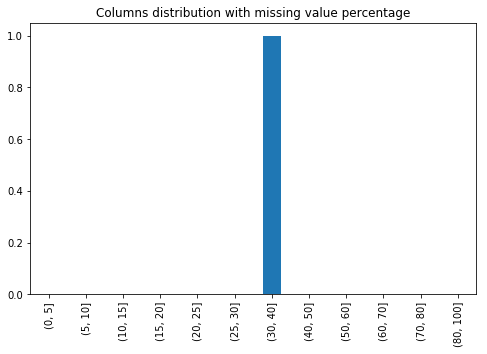

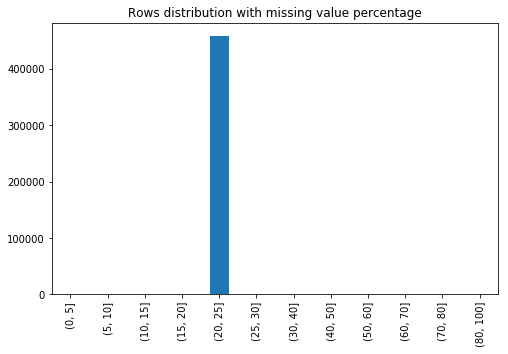

In [13]:
full_cols_c, most_missing_cols_c , impute_cols_c=assess_missing_value(calendar)
print_cols_list(full_cols_c,'no missing')
print_cols_list(most_missing_cols_c,'most missing')
print_cols_list(impute_cols_c,'imputing')

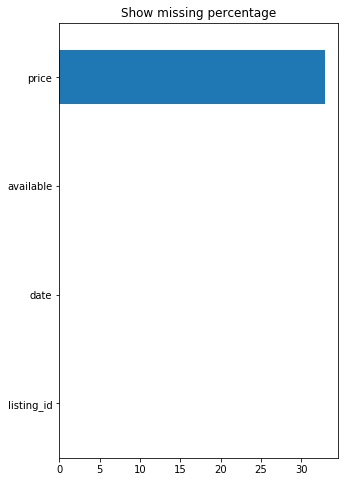

In [14]:
 #show missing percentage barh
(calendar.isnull().mean()*100).sort_values(ascending=True)[-30:].plot.barh(title="Show missing percentage",figsize=(5,8));

In [15]:
unique_cols_c=assess_unique_value(calendar)
print_cols_list(unique_cols_c,'unique')


0 unique columns are following:
 []


In [16]:
"""
classify by actions : Get drop or imputation actions list based on classification after get colums list with unique vlaue
    drop columns list 
    fullfill columns list
    imputation columns list
"""
all_cols_c_list=calendar.columns.values.tolist()
drop_cols_c=union_cols_list(most_missing_cols_c,unique_cols_c)
keep_cols_c=minus_cols_list(all_cols_c_list,drop_cols_c)
keep_full_cols_c=intersection_cols_list(keep_cols_c,full_cols_c)
keep_impute_cols_c=intersection_cols_list(keep_cols_c,impute_cols_c)

print_cols_list(drop_cols_c,'dropping')
print_cols_list(keep_full_cols_c,'no missing')
print_cols_list(keep_impute_cols_c,'imputing')


0 dropping columns are following:
 []

3 no missing columns are following:
 ['date', 'listing_id', 'available']

1 imputing columns are following:
 ['price']


In [17]:
print(get_missing_rate(calendar,'price'))

32.9389983998


In [18]:
pd.to_datetime(calendar['date']).describe()

count                 1393570
unique                    365
top       2016-12-27 00:00:00
freq                     3818
first     2016-01-04 00:00:00
last      2017-01-02 00:00:00
Name: date, dtype: object

In [19]:
c_nonnumeric_cols_list=check_nonnumeric_cols(calendar)


Show the dataset example:
         date available   price
0  2016-01-04         t  $85.00
1  2016-01-05         t  $85.00
2  2016-01-06         f     NaN
3  2016-01-07         f     NaN
4  2016-01-08         f     NaN


In [20]:
a = calendar['available'].describe().reset_index()
b = calendar['available'].value_counts().reset_index()
c=pd.concat([a,b])
c

,index,available
0,count,1393570
1,unique,2
2,top,t
3,freq,934542
0,t,934542
1,f,459028


The number of missing value of available columns is:0 
The available columns type is:object 


,index,available
0,count,1393570
1,unique,2
2,top,t
3,freq,934542
0,t,0.67061
1,f,0.32939
0,t,0.67061
1,f,0.32939


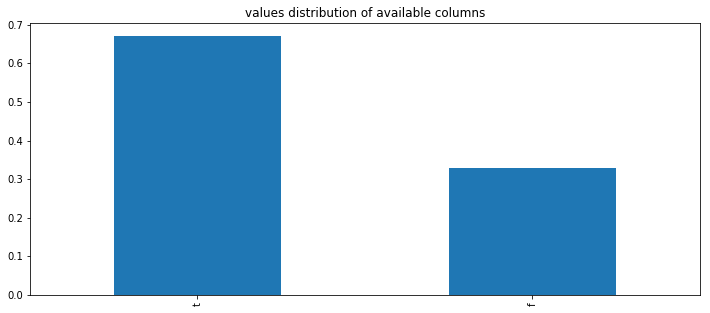

In [21]:
assess_nonnumeric(calendar,'available')

The number of missing value of price columns is:459028 
The price columns type is:object 


,index,price
0,count,934542
1,unique,669
2,top,$150.00
3,freq,36646
0,$150.00,0.0262965
1,$100.00,0.0227868
2,$75.00,0.0213983
3,$125.00,0.0197608
0,$744.00,7.17581e-07
1,$685.00,7.17581e-07


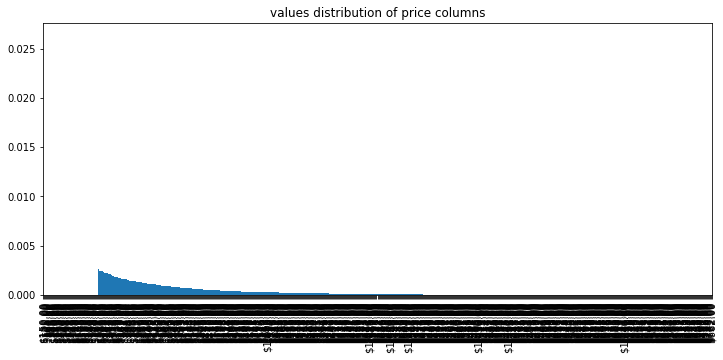

In [22]:
assess_nonnumeric(calendar,'price')[:10]

### Conclusion
 - No missing value columns: listing_id ,date ,available
      - data colum should be converted to datatime type.
      - available column should be convert to bool type.
 - Price column with about missing value. they miss value while available is false. the rows with missing price value can be set to 0. Special char e.g. '$ ,' should be removed. the column should be coverted to float type.

 

#### 2.2.2 Assess listings dataset

In [23]:
get_base_info(listings)

The dataset contains 3818 rows and 92 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null 


47 no missing columns are following:
 ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'experiences_offered', 'picture_url', 'host_id', 'host_url', 'host_verifications', 'street', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'room_type', 'accommodates', 'bed_type', 'amenities', 'price', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'requires_license', 'jurisdiction_names', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count']

6 most missing columns are following:
 ['notes', 'square_feet', 'weekly_price', 'monthly_price', 'security_deposit', 'license']

39 

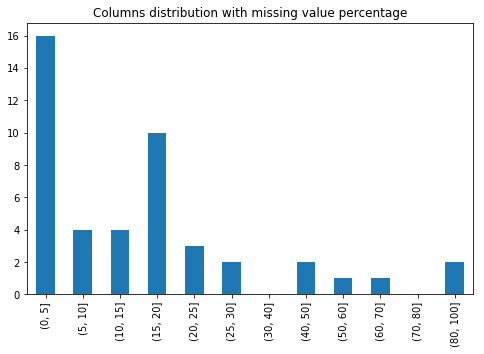

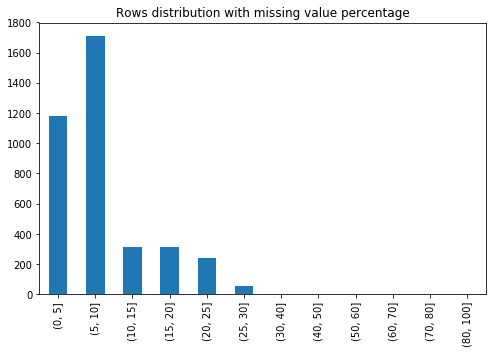

In [24]:
full_cols_l, most_missing_cols_l , impute_cols_l=assess_missing_value(listings)
print_cols_list(full_cols_l,'no missing')
print_cols_list(most_missing_cols_l,'most missing')
print_cols_list(impute_cols_l,'imputing')

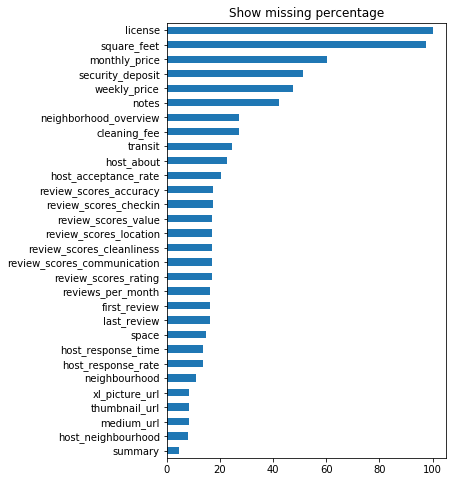

In [25]:
 #show missing percentage barh
(listings.isnull().mean()*100).sort_values(ascending=True)[-30:].plot.barh(title="Show missing percentage",figsize=(5,8));

In [26]:
unique_cols_l=assess_unique_value(listings)
print_cols_list(unique_cols_l,'unique')


11 unique columns are following:
 ['scrape_id', 'last_scraped', 'experiences_offered', 'market', 'country_code', 'country', 'has_availability', 'calendar_last_scraped', 'requires_license', 'license', 'jurisdiction_names']


In [27]:
"""
classify by actions : Get drop or imputation actions list based on classification after get colums list with unique vlaue
    drop columns list 
    fullfill columns list
    imputation columns list
"""
all_cols_l_list=listings.columns.values.tolist()
drop_cols_l=union_cols_list(most_missing_cols_l,unique_cols_l)
keep_cols_l=minus_cols_list(all_cols_l_list,drop_cols_l)
keep_full_cols_l=intersection_cols_list(keep_cols_l,full_cols_l)
keep_impute_cols_l=intersection_cols_list(keep_cols_l,impute_cols_l)

print_cols_list(drop_cols_l,'dropping')
print_cols_list(keep_full_cols_l,'no missing')
print_cols_list(keep_impute_cols_l,'imputing')


16 dropping columns are following:
 ['country', 'has_availability', 'notes', 'jurisdiction_names', 'requires_license', 'calendar_last_scraped', 'security_deposit', 'market', 'monthly_price', 'scrape_id', 'weekly_price', 'square_feet', 'experiences_offered', 'license', 'country_code', 'last_scraped']

37 no missing columns are following:
 ['room_type', 'is_location_exact', 'require_guest_profile_picture', 'smart_location', 'availability_60', 'accommodates', 'state', 'id', 'amenities', 'cancellation_policy', 'bed_type', 'require_guest_phone_verification', 'instant_bookable', 'guests_included', 'latitude', 'availability_365', 'calendar_updated', 'maximum_nights', 'host_url', 'street', 'extra_people', 'host_id', 'neighbourhood_cleansed', 'calculated_host_listings_count', 'description', 'host_verifications', 'minimum_nights', 'number_of_reviews', 'listing_url', 'neighbourhood_group_cleansed', 'city', 'availability_30', 'name', 'availability_90', 'price', 'longitude', 'picture_url']

39 imp

In [28]:
num_full_cols_list=check_numeric_cols(listings[keep_full_cols_l])
len(num_full_cols_list)


Show the dataset example:
   availability_60  accommodates       id  guests_included   latitude  \
0               41             4   241032                2  47.636289   
1               13             4   953595                1  47.639123   
2                6            11  3308979               10  47.629724   
3                0             3  7421966                1  47.638473   
4               60             6   278830                6  47.632918   

   availability_365  maximum_nights   host_id  calculated_host_listings_count  \
0               346             365    956883                               2   
1               291              90   5177328                               6   
2               220              30  16708587                               2   
3               143            1125   9851441                               1   
4               365            1125   1452570                               1   

   minimum_nights  number_of_reviews  availabil

14

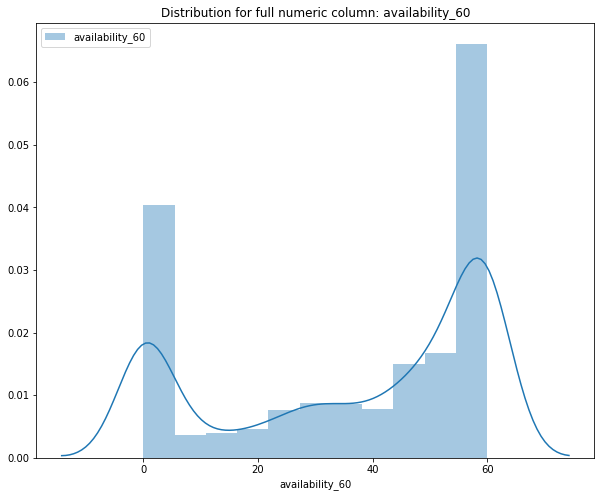

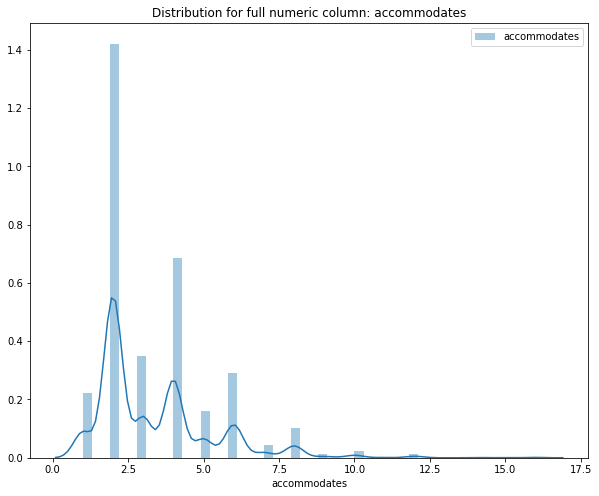

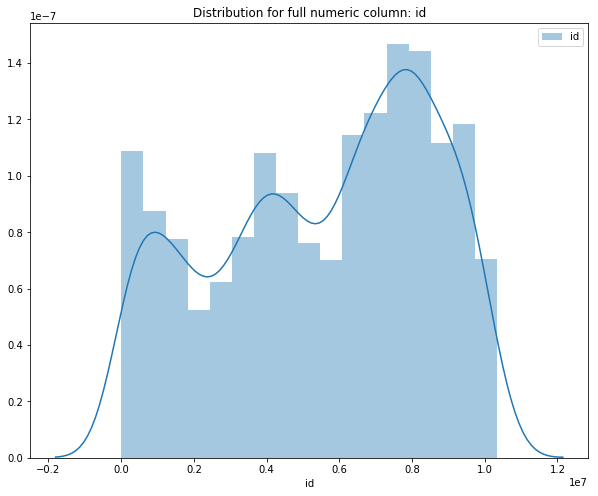

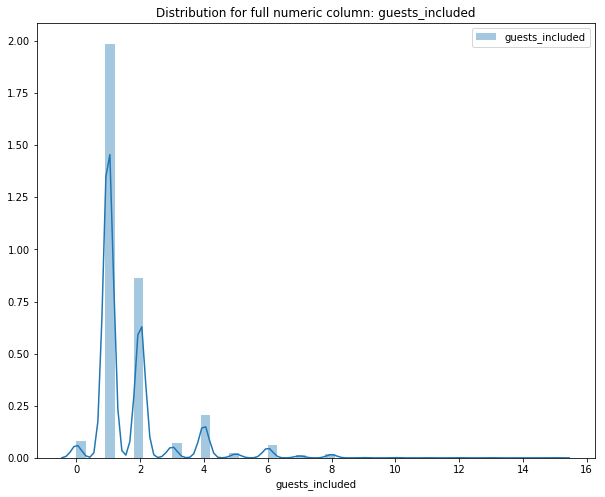

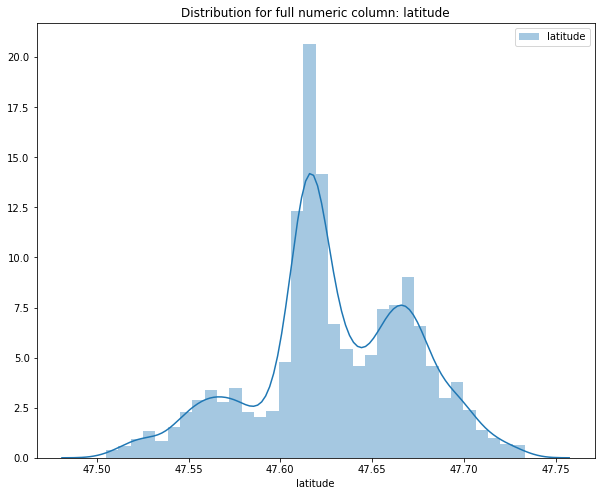

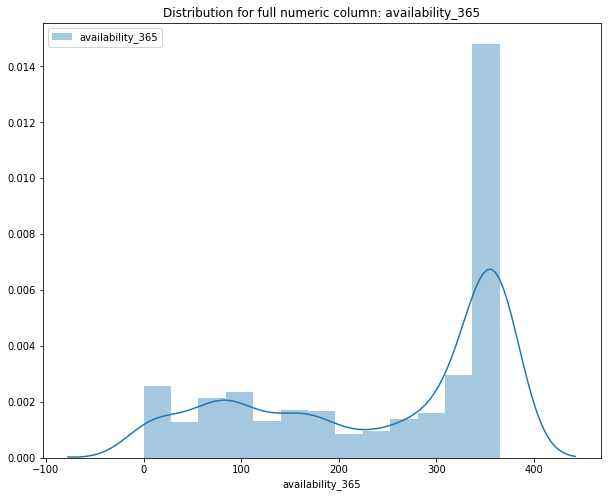

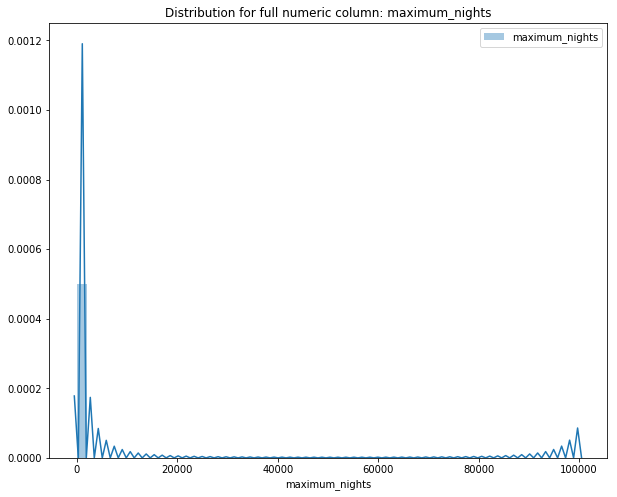

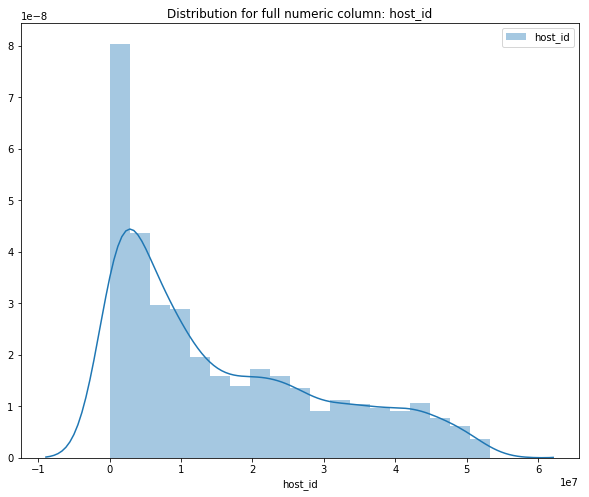

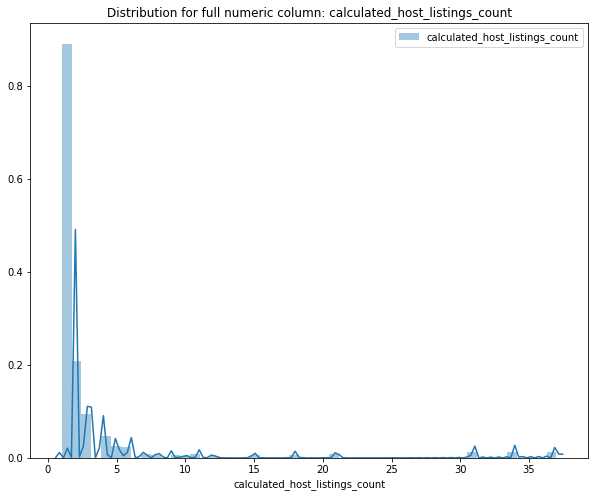

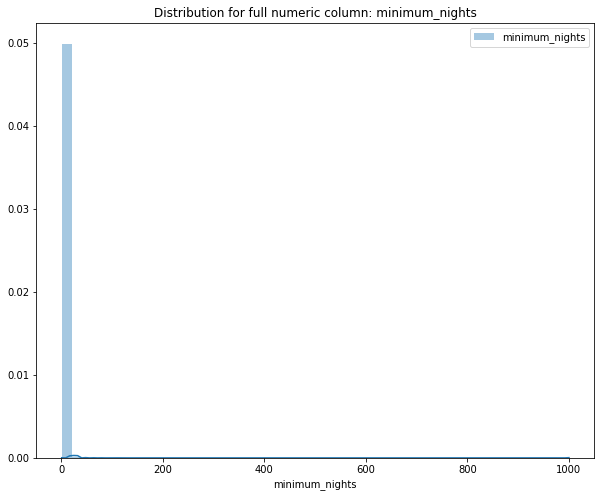

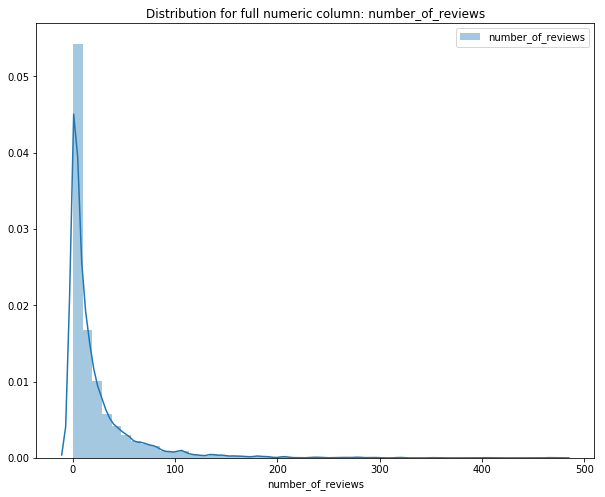

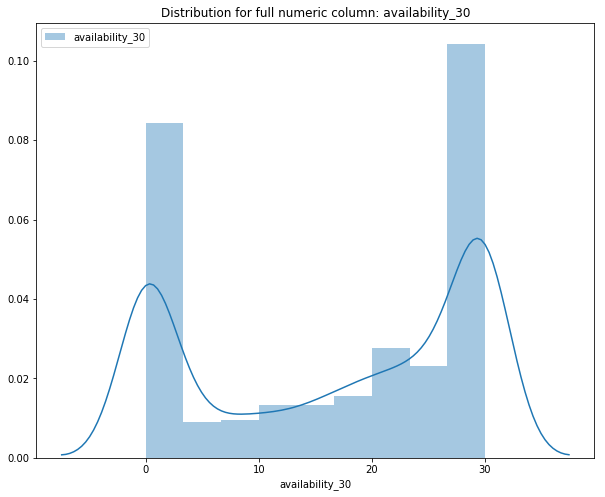

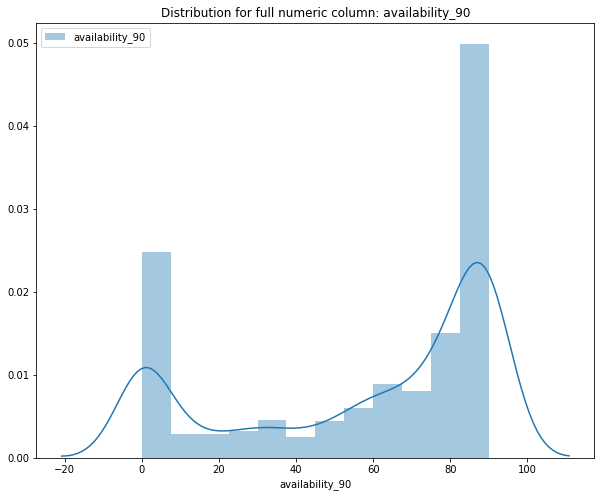

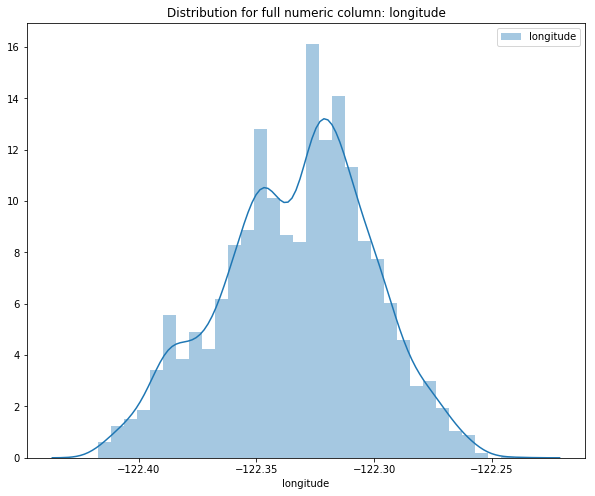

In [29]:
assess_full_numeric(listings,num_full_cols_list)

In [30]:
num_impute_cols_list=check_numeric_cols(listings[keep_impute_cols_l])
len(num_impute_cols_list)


Show the dataset example:
   review_scores_value  host_listings_count  host_total_listings_count  \
0                 10.0                  3.0                        3.0   
1                 10.0                  6.0                        6.0   
2                 10.0                  2.0                        2.0   
3                  NaN                  1.0                        1.0   
4                  9.0                  2.0                        2.0   

   bathrooms  review_scores_communication  bedrooms  reviews_per_month  \
0        1.0                         10.0       1.0               4.07   
1        1.0                         10.0       1.0               1.48   
2        4.5                         10.0       5.0               1.15   
3        1.0                          NaN       0.0                NaN   
4        2.0                         10.0       3.0               0.89   

   review_scores_checkin  review_scores_location  review_scores_accuracy  \
0      

13

In [31]:
l_nonnumeric_cols_list=check_nonnumeric_cols(listings[keep_full_cols_l])


colum number is too large. Transpose the columns to show 3 rows
23
                                                                                  0  \
room_type                                                           Entire home/apt   
is_location_exact                                                                 t   
require_guest_profile_picture                                                     f   
smart_location                                                          Seattle, WA   
state                                                                            WA   
amenities                         {TV,"Cable TV",Internet,"Wireless Internet","A...   
cancellation_policy                                                        moderate   
bed_type                                                                   Real Bed   
require_guest_phone_verification                                                  f   
instant_bookable                                              

In [32]:
(listings['require_guest_phone_verification']==listings['require_guest_profile_picture']).mean()*100

97.852278679937143

The number of missing value of is_location_exact columns is:0 
The is_location_exact columns type is:object 


,index,is_location_exact
0,count,3818
1,unique,2
2,top,t
3,freq,3412
0,t,0.893662
1,f,0.106338
0,t,0.893662
1,f,0.106338


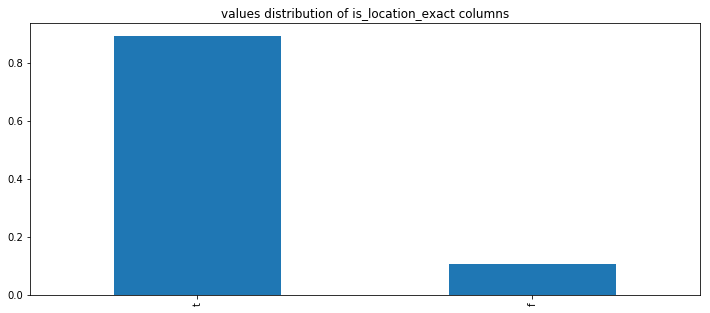

In [33]:
assess_nonnumeric(listings,'is_location_exact')

In [34]:
l_nonnumeric_impute_cols_list=check_nonnumeric_cols(listings[keep_impute_cols_l])


colum number is too large. Transpose the columns to show 3 rows
26
                                                                        0  \
host_acceptance_rate                                                 100%   
host_identity_verified                                                  t   
xl_picture_url                                                        NaN   
host_is_superhost                                                       f   
host_name                                                           Maija   
cleaning_fee                                                          NaN   
last_review                                                    2016-01-02   
neighborhood_overview                                                 NaN   
host_response_rate                                                    96%   
space                   Make your self at home in this charming one-be...   
host_picture_url        https://a0.muscache.com/ac/users/956883/profil...   
neighbou

The number of missing value of host_response_time columns is:523 
The host_response_time columns type is:object 


,index,host_response_time
0,count,3295
1,unique,4
2,top,within an hour
3,freq,1692
0,within an hour,0.443164
1,within a few hours,0.253536
2,within a day,0.156365
3,a few days or more,0.00995285
0,within an hour,0.443164
1,within a few hours,0.253536


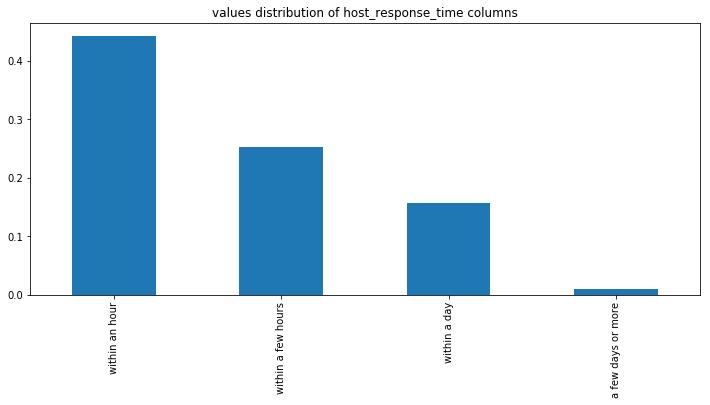

In [35]:
assess_nonnumeric(listings,'host_response_time')

The number of missing value of require_guest_profile_picture columns is:0 
The require_guest_profile_picture columns type is:object 


,index,require_guest_profile_picture
0,count,3818
1,unique,2
2,top,f
3,freq,3497
0,f,0.915925
1,t,0.0840754
0,f,0.915925
1,t,0.0840754


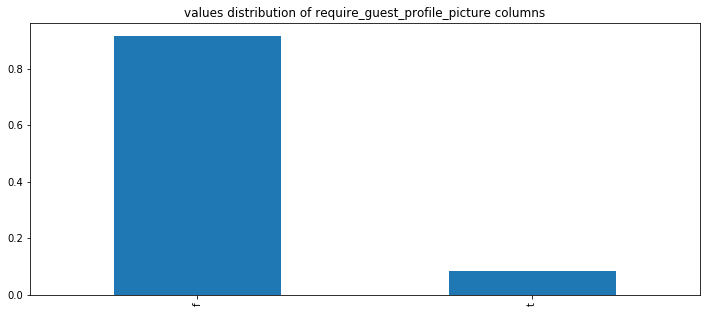

In [36]:
assess_nonnumeric(listings,'require_guest_profile_picture')

The number of missing value of property_type columns is:1 
The property_type columns type is:object 


,index,property_type
0,count,3817
1,unique,16
2,top,House
3,freq,1733
0,House,0.453903
1,Apartment,0.447355
2,Townhouse,0.0309062
3,Condominium,0.0238345
0,Treehouse,0.000785752
1,Chalet,0.000523834


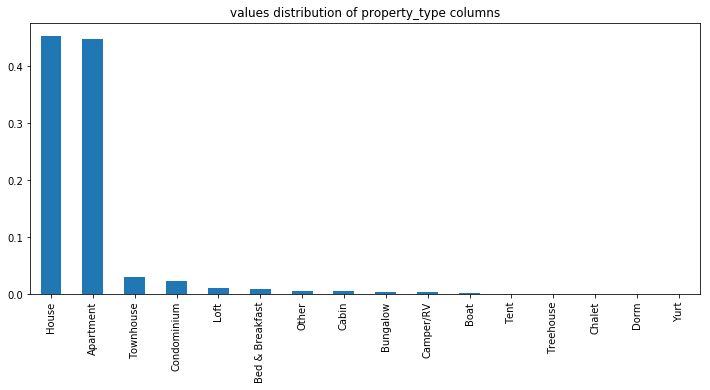

In [37]:
assess_nonnumeric(listings,'property_type')

In [38]:
listings['property_type'].isnull().mean()

0.00026191723415400735

The most important property_type are following. others can be skipped.
- House              0.453903
- Apartment          0.447355
- Townhouse          0.030906
- Condominium        0.023834
- Loft               0.010477

The number of missing value of calendar_updated columns is:0 
The calendar_updated columns type is:object 


,index,calendar_updated
0,count,3818
1,unique,34
2,top,today
3,freq,706
0,today,0.184914
1,2 weeks ago,0.0908853
2,3 weeks ago,0.0785752
3,2 months ago,0.0735987
0,17 months ago,0.000261917
1,15 months ago,0.000261917


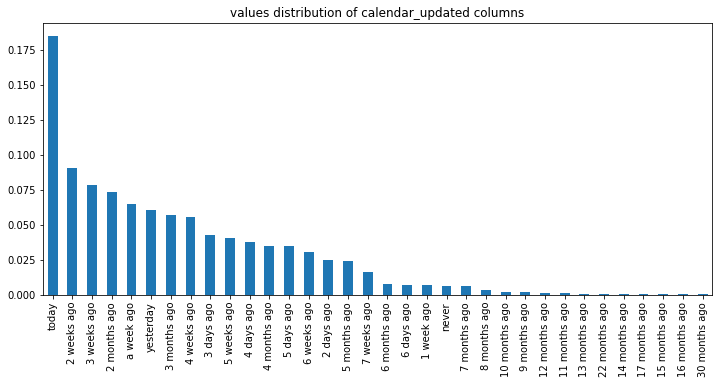

In [39]:
assess_nonnumeric(listings,'calendar_updated')

The number of missing value of room_type columns is:0 
The room_type columns type is:object 


,index,room_type
0,count,3818
1,unique,3
2,top,Entire home/apt
3,freq,2541
0,Entire home/apt,0.665532
1,Private room,0.303824
2,Shared room,0.0306443
0,Entire home/apt,0.665532
1,Private room,0.303824
2,Shared room,0.0306443


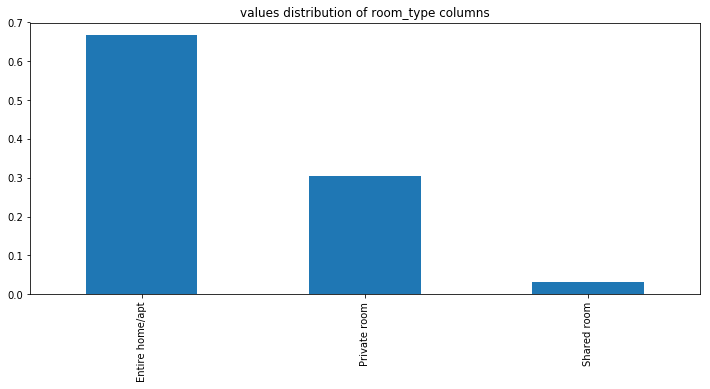

In [40]:
assess_nonnumeric(listings,'room_type')

The number of missing value of cancellation_policy columns is:0 
The cancellation_policy columns type is:object 


,index,cancellation_policy
0,count,3818
1,unique,3
2,top,strict
3,freq,1417
0,strict,0.371137
1,moderate,0.327658
2,flexible,0.301205
0,strict,0.371137
1,moderate,0.327658
2,flexible,0.301205


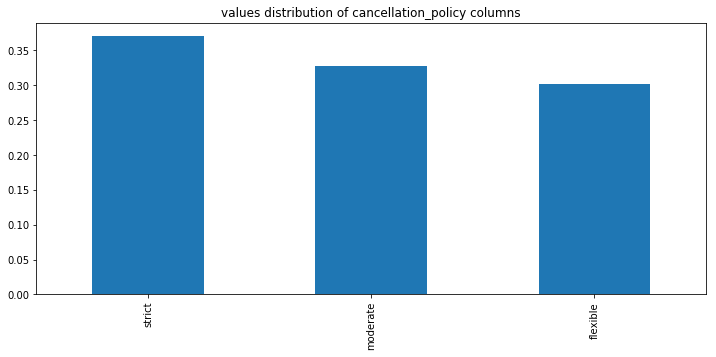

In [41]:
assess_nonnumeric(listings,'cancellation_policy')

The number of missing value of neighbourhood_group_cleansed columns is:0 
The neighbourhood_group_cleansed columns type is:object 


,index,neighbourhood_group_cleansed
0,count,3818
1,unique,17
2,top,Other neighborhoods
3,freq,794
0,Other neighborhoods,0.207962
1,Capitol Hill,0.148507
2,Downtown,0.138816
3,Central Area,0.0966475
0,Lake City,0.0175485
1,Magnolia,0.015977


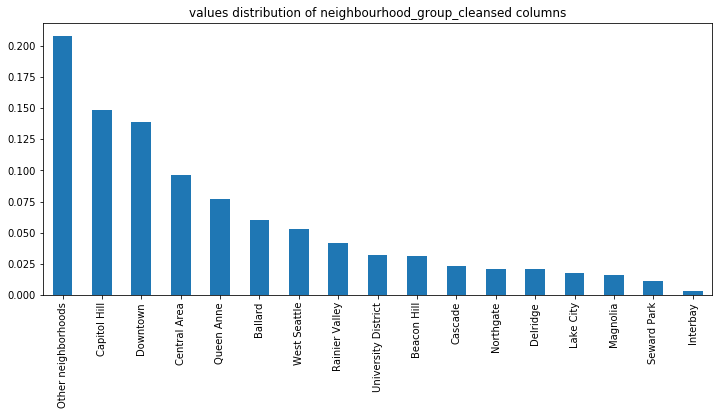

In [42]:
assess_nonnumeric(listings,'neighbourhood_group_cleansed')

The number of missing value of neighbourhood_cleansed columns is:0 
The neighbourhood_cleansed columns type is:object 


,index,neighbourhood_cleansed
0,count,3818
1,unique,87
2,top,Broadway
3,freq,397
0,Broadway,0.103981
1,Belltown,0.0612886
2,Wallingford,0.0437402
3,Fremont,0.0413829
0,Pinehurst,0.00104767
1,South Beacon Hill,0.00104767


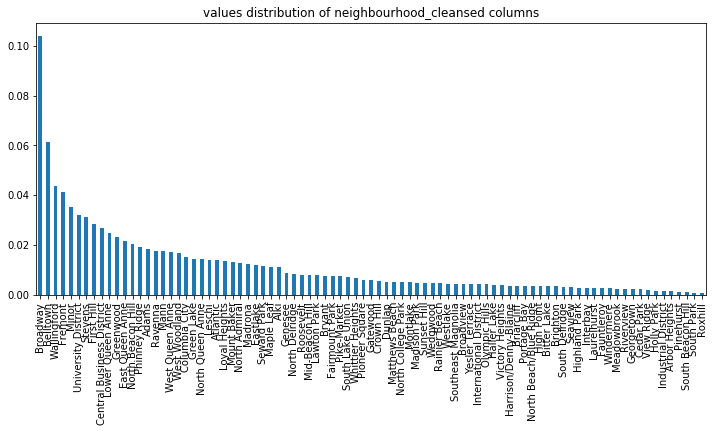

In [43]:
assess_nonnumeric(listings,'neighbourhood_cleansed')

The number of missing value of zipcode columns is:7 
The zipcode columns type is:object 


,index,zipcode
0,count,3811
1,unique,28
2,top,98122
3,freq,420
0,98122,0.110005
1,98103,0.103195
2,98102,0.0887899
3,98105,0.0589314
0,98178,0.00183342
1,98134,0.00130959


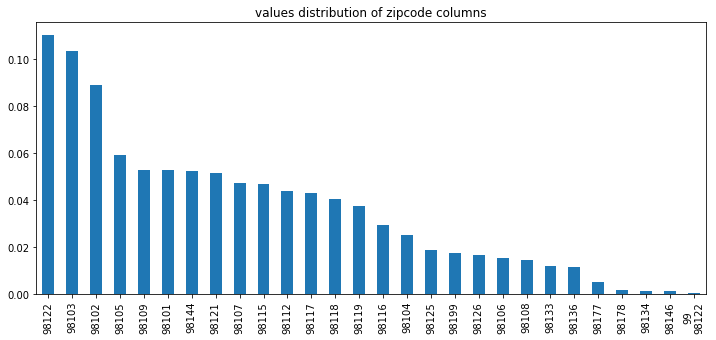

In [44]:
assess_nonnumeric(listings,'zipcode')

### Conclusion
 - The following 16 columns coming from 6 most Missing columns union 11 columns with unique value will be dropped.
     - ['security_deposit', 'last_scraped', 'market', 'license', 'has_availability', 'country_code', 'calendar_last_scraped', 'country', 'monthly_price', 'weekly_price', 'notes', 'requires_license', 'square_feet', 'jurisdiction_names', 'scrape_id', 'experiences_offered']
 - 37 no missing columns :(14 numeric columns, 23 nonnumeric columns), 23 nonnumeric columns are following:
     - 'smart_location','state','city' are also a column with unique value, because more thant 99% value is same. other value seem has the same meaning. so these columns will be removed.
     - 95% 'bed_type' is real bed, so I think it is a column with unique value. It can be dropped.
     - 'description','name' are descripsive columns, they can be dropped.
     - 'amenities' describes a basic configuration in room, they can be dropped.
     - 'neighbourhood_cleansed','street' will be dropped because other location colums provides similar information.
     - 'host_verifications' will be dropped because host_identity_verified provides same information.
     - 'require_guest_profile_picture' will be dropped because more thant 97.85% value is same as require_guest_phone_verification
     - 'calendar_updated'  will be dropped because review dataset provides similar information.
     - 'host_url','listing_url'and 'picture_url' will be dropped because they provide less predictive information.
     - 'is_location_exact','require_guest_phone_verification','instant_bookable' are bool type and need imputation.
     - 'neighbourhood_group_cleansed',	'room_type','cancellation_policy' are string/category type and need be converted to  dummies variable.

 - 39 imputing columns :(13 numeric columns, 26 nonnumeric columns), 26 nonnumeric columns are following:
      - 'summary' are  duplicated colum and can be dropped because they are decomposed into more specific features thereafter. 
      - 'host_about','host_picture_url','neighborhood_overview','transit','host_name','space','host_location', 'host_has_profile_pic'  are descripsive columns, they have little impact on predictions and can be ignored.
      - 'last_review','first_review' are 	duplication	information and can be ignored. Review dataset also includes them.
      - 'neighbourhood' are duplication	information and can be ignored.		other colums provides similar information.
      - 'host_neighbourhood','host_thumbnail_url','xl_picture_url' are less prediction. They provide less predictive information.
      - 'host_is_superhost','host_identity_verified' are bool type and need to be	imputed.
      - 'host_response_time' is category type and need to be	imputed.
      - 'host_response_rate','host_acceptance_rate' are numeric type and need to be imputed.
      - 'cleaning_fee' is numeric type and need to be imputed as most frequent value.
      - 'host_since' are numeric type and can be converted to years since beginning.
      - 'zipcode','property_type','host_response_time' are category type  and need to be	imputed. zipcode has invisible char and can be corrected. And proper_type has incorrect value(e.g. Bed & Breakfast), but the ratio is small and can be ignored.
      - 'medium_url','thumbnail_url' are category type and can be converted to  1 if value exit, or 0. it means airbnb are linked to social medium.

#### 2.2.3 Assess reviews dataset

In [45]:
get_base_info(reviews)

The dataset contains 84849 rows and 6 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84832 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB

Show the dataset example:
   listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   
2     7202016  39820030  2015-07-26     37722850           Ian   
3     7202016  40813543  2015-08-02     33671805        George   
4     7202016  41986501  2015-08-10     34959538          Ming   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a


5 no missing columns are following:
 ['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name']

0 most missing columns are following:
 []

1 imputing columns are following:
 ['comments']


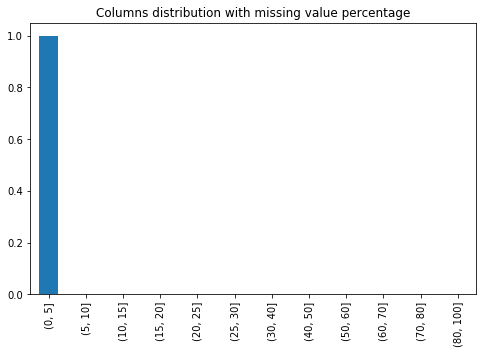

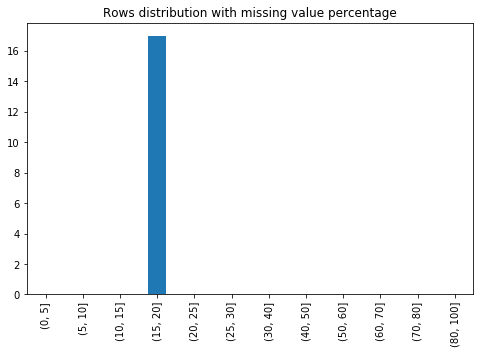

In [46]:
full_cols_r, most_missing_cols_r , impute_cols_r=assess_missing_value(reviews)
print_cols_list(full_cols_r,'no missing')
print_cols_list(most_missing_cols_r,'most missing')
print_cols_list(impute_cols_r,'imputing')

In [47]:
unique_cols_r=assess_unique_value(reviews)
print_cols_list(unique_cols_r,'unique')


0 unique columns are following:
 []


In [48]:
"""
classify by actions : Get drop or imputation actions list based on classification after get colums list with unique vlaue
    drop columns list 
    fullfill columns list
    imputation columns list
"""
all_cols_r_list=reviews.columns.values.tolist()
drop_cols_r=union_cols_list(most_missing_cols_r,unique_cols_r)
keep_cols_r=minus_cols_list(all_cols_r_list,drop_cols_r)
keep_full_cols_r=intersection_cols_list(keep_cols_r,full_cols_r)
keep_impute_cols_r=intersection_cols_list(keep_cols_r,impute_cols_r)

print_cols_list(drop_cols_r,'dropping')
print_cols_list(keep_full_cols_r,'no missing')
print_cols_list(keep_impute_cols_r,'imputing')



0 dropping columns are following:
 []

5 no missing columns are following:
 ['date', 'id', 'reviewer_name', 'listing_id', 'reviewer_id']

1 imputing columns are following:
 ['comments']


In [49]:
#%debug
check_nonnumeric_cols(reviews[keep_full_cols_r])


Show the dataset example:
         date reviewer_name
0  2015-07-19        Bianca
1  2015-07-20         Frank
2  2015-07-26           Ian
3  2015-08-02        George
4  2015-08-10          Ming


['date', 'reviewer_name']

### Conclusion for review dataset
The dataset contains 84849 rows and 6 columns.
- 5 no missing columns are following:
  - 'listing_id', 'id',  'reviewer_id' are numeric columns.
  - 'date' column should be converted to datetime type.
  - 'reviewer_name' column provides duplicated information and reviewer_id can replace it.
  - 1 imputing columns are 'comments'. but missing value in comment cannot be imputed. but we can count it as occupation rate. so it can convert to bool type.
  
  


## 3 Data Preparation
 - Prepare lists for data clean
     - create column handling list based on data assessment.because these original columns shows as other types.
     - classify by types : verify data type based on classification
         - numeric columns list
         - datetime columns list
         - bool columns list
         - category columns list
 - Data Clean
     - drop columns or rows
     - handle data type of columns. Check if any columns are of different data types than you would expect ex: 
           - 1) numbers showing as strings
           - 2) String includes invisible char.
         
 - Select and Re-Encode Features
      
      Check the columns of the dataset. For numeric and interval data, these features can be kept without changes. Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (kept without any changes). Special handling may be necessary for the remaining two variable types: categorical, and 'mixed' columns.
 
     - Convert to target date type.
     - Re-Encode Categorical Features. Category columns get dummies. Depending on the number of categories, perform one of the following:
       - binary (two-level) categoricals with numeric values: do nothing.
       - binary variable with non-numeric values: re-encode the values as numbers or create a dummy variable.
       - Multi-level categoricals (three or more values): encode the values using multiple dummy variables or just drop them from the analysis. As always, document the choices in the Discussion section.
     - Engineer Mixed-Type Features
       - There are a handful of features that are marked as "mixed" columns in the dataset that require special treatment in order to be included in the analysis.
     - Complete Feature Selection.   To summarize, the dataframe should consist of the following:
       - All numeric, interval, and ordinal type columns from the original dataset.
       - Binary categorical features (all numerically-encoded).
       - Engineered features from other multi-level categorical features and mixed features.
     
 - Feature transforming
     - imputation columns
         1. use mean, mode, averge as imputation value.
         2. use ML prediction value as imputation value.
     - Make columns type clean that only inlcude basic type: int, float, string,list, dict, set.
     - Apply Feature Scaling
       - Normalize
       - Standardize
        

In [50]:
def initial_classify_types(df,drop_cols_list):
    """
    function description:
      Get the inital dtype columns.
    Input:
        df:Dateframe, the target dataframe.
        drop_cols_list: drop columns list based on value distribution.
    Return:
        result: dict={dtype:list}, get the initial information from dataset.
    """
    result={}
    dtype_dict={'datetime':'datetime','numeric':np.number,'bool':'bool','category':'object'}
    for k,v in dtype_dict.items():
         result[k]=df.select_dtypes(include=[v]).columns.values.tolist()
            
    # drop colum names also is removed from target after creating intial resut.
    for k, v in result.items():
        result[k]=minus_cols_list(result[k],drop_cols_list)   
    return result

In [51]:
def adjust_cols_list(df,assess_result,drop_cols_list): 
    """
    function description:
      classify by types : 
      - Get the inital dtype columns.
      - adjust dtype columns list based on the assessment result
    Input:
        assess_result:dict={dtype:list}, assessment result of dataset.
        drop_cols_list: drop columns list based on value distribution.
    Return:
        dtype_dict: dict={dtype:list},adjusted dtype dict based on the assessment result
    """
    # Get the inital dtype columns.
    dtypes_dict=initial_classify_types(df,drop_cols_list)
    # union for same data type, minus for diff data type
    for k, v in dtypes_dict.items():
        for ak,av in assess_result.items():
            if k == ak :
                dtypes_dict[k]=union_cols_list(dtypes_dict[k],assess_result[ak])
            elif ak !='drop':
                dtypes_dict[k]=minus_cols_list(dtypes_dict[k],assess_result[ak]) 
                
    # drop colum names also is removed from target after adjusting dtypes_dict.
    for k, v in dtypes_dict.items():
        dtypes_dict[k]=minus_cols_list(dtypes_dict[k],assess_result['drop'])
    
    # create the total drop columns list
    dtypes_dict['drop'] = assess_result['drop']+drop_cols_list
    # show result
    for k, v in dtypes_dict.items():
        print_cols_list(dtypes_dict[k],k)
   
    return dtypes_dict

In [52]:
"""
verify data type for columns
Check if any columns are of different data types than you would expect ex:
1) numbers showing as strings
2) String includes invisible char.
"""
def del_series_special_char(df_series, special_char,target_char=''):
    return df_series.str.replace(special_char,target_char) 

def del_df_special_char(df, special_char_string='$,'):
    """
    Function description:
      remove special char in object/string columns
    Input:
      df: Dataframe, dataset with only object/string columns.
      special_char_string:string, special char string. default is '$,'.
    Retrun:
      df:  Dataframe, dataset with only object/string columns after handling.
    """
    special_char_list=list(special_char_string)
    for col in df.columns.values.tolist():
        for s in special_char_list:
            df[col]= del_series_special_char(df[col], s)
    return df


### 3.1 Data Preparation for calendar
### calendar assessment conclusion
 - No missing value columns: listing_id ,date ,available
      - data colum should be converted to datatime type.
      - available column should be convert to bool type.
 - Price column with about missing value. they miss value while available is false. the rows with missing price value can be set to 0. Special char e.g. '$ ,' should be removed. the column should be coverted to float type.


#### 3.1.1 Prepare lists for data clean


In [53]:
# create column handling list based on data assessment. 
# because these original columns shows as other types.
assess_result_c={}
assess_result_c['drop']=[]
assess_result_c['datetime']=['date']
assess_result_c['numeric']=['price']
assess_result_c['bool']=['available']
assess_result_c['category']=[]
print(assess_result_c)

{'datetime': ['date'], 'category': [], 'numeric': ['price'], 'drop': [], 'bool': ['available']}


In [54]:
# adjust columns lists
dtypes_c_dict=adjust_cols_list(calendar,assess_result_c,drop_cols_c)


1 datetime columns are following:
 ['date']

0 drop columns are following:
 []

2 numeric columns are following:
 ['listing_id', 'price']

0 category columns are following:
 []

1 bool columns are following:
 ['available']


#### 3.1.2 data clean for calendar dataset
  - drop columns or rows
  - verify data type for columns. Check if any columns are of different data types than you would expect ex: 
     - 1) numbers showing as strings
     - 2) String includes invisible char.
         

##### 3.1.2.1 drop columns or rows

In [55]:
#remove drop colums from all columns and select them to clean dataset.
clean_calendar_cols = minus_cols_list(all_cols_c_list,dtypes_c_dict['drop'])
clean_calendar=calendar[clean_calendar_cols]

In [56]:
get_base_info(clean_calendar)

The dataset contains 1393570 rows and 4 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
date          1393570 non-null object
price         934542 non-null object
listing_id    1393570 non-null int64
available     1393570 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB

Show the dataset example:
         date   price  listing_id available
0  2016-01-04  $85.00      241032         t
1  2016-01-05  $85.00      241032         t
2  2016-01-06     NaN      241032         f
3  2016-01-07     NaN      241032         f
4  2016-01-08     NaN      241032         f


##### 3.1.1.2 handle data type for columns

In [57]:
#numbers showing as strings
obj2num_c_list=assess_result_c['numeric']
clean_calendar[obj2num_c_list]=del_df_special_char(clean_calendar.loc[:,obj2num_c_list])
clean_calendar[obj2num_c_list].head()    

,price
0,85.00
1,85.00
2,NaN
3,NaN
4,NaN


The number of missing value of price columns is:459028 
The price columns type is:object 
    index        price
0   count       934542
1  unique          669
2     top       150.00
3    freq        36646
0  150.00    0.0262965
1  100.00    0.0227868
2   75.00    0.0213983
3  125.00    0.0197608
0  566.00  7.17581e-07
1  406.00  7.17581e-07
2  533.00  7.17581e-07
3  658.00  7.17581e-07


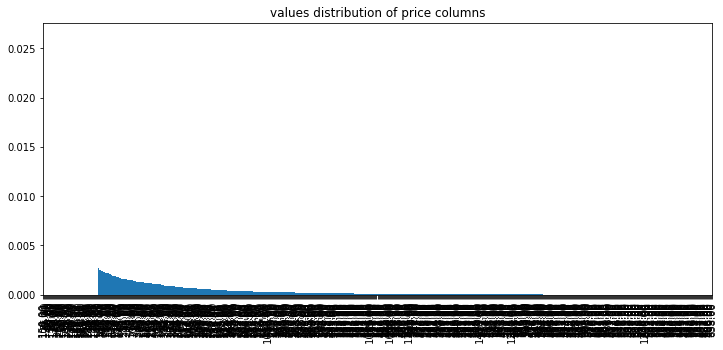

In [58]:
# check column value distribution.
for col in  obj2num_c_list:
    col_desc=assess_nonnumeric(clean_calendar,col)
    print(col_desc)

#### 3.1.3 Select and Re-Encode Features for calendar dataset
 - Select and Re-Encode Features
     - Convert columns type to target date type.
     - Re-Encode Categorical Features. Category columns get dummies. Depending on the number of categories, perform one of the following:
       - binary (two-level) categoricals with numeric values: do nothing.
       - binary variable with non-numeric values: re-encode the values as numbers or create a dummy variable.
       - Multi-level categoricals (three or more values): encode the values using multiple dummy variables or just drop them from the analysis. As always, document the choices in the Discussion section.
     - Engineer Mixed-Type Features
       - There are a handful of features that are marked as "mixed" columns in the dataset that require special treatment in order to be included in the analysis.
     - Complete Feature Selection.   To summarize, the dataframe should consist of the following:
       - All numeric, interval, and ordinal type columns from the original dataset.
       - Binary categorical features (all numerically-encoded).
       - Engineered features from other multi-level categorical features and mixed features.

##### 3.1.3.1 Convert columns type to target date type.

In [59]:
# convert date to datetime based on assesssment result.
for d in assess_result_c['datetime']:
    clean_calendar[d] = pd.to_datetime(clean_calendar[d])
clean_calendar[assess_result_c['datetime']].head()

,date
0,2016-01-04
1,2016-01-05
2,2016-01-06
3,2016-01-07
4,2016-01-08


In [60]:
clean_calendar[assess_result_c['datetime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 1 columns):
date    1393570 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 10.6 MB


##### 3.1.3.2 Re-Encode Categorical Features

The number of missing value of available columns is:0 
The available columns type is:object 
    index available
0   count   1393570
1  unique         2
2     top         t
3    freq    934542
0       t   0.67061
1       f   0.32939
0       t   0.67061
1       f   0.32939


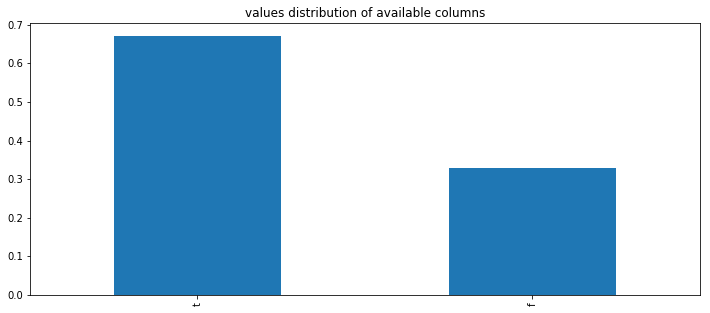

In [61]:
# binary variable with non-numeric values:convert available column to binary category

# check column value distribution.
for col in  dtypes_c_dict['bool']:
    col_desc=assess_nonnumeric(clean_calendar,col)
    print(col_desc)

In [62]:
# binary variable with non-numeric values:convert available column to binary category
mapping={'t':True,'f':False}
for col in dtypes_c_dict['bool']:
    clean_calendar[col]=clean_calendar[col].map(mapping)

clean_calendar[dtypes_c_dict['bool']].head()

,available
0,True
1,True
2,False
3,False
4,False


##### 3.1.3.3 Engineer Mixed-Type Features

In [63]:
#NO Mixed type features

#### 3.1.3.4 Complete Feature Selection. 

To summarize, the dataframe should consist of the following:
 - All numeric, interval, and ordinal type columns from the original dataset.
 - Binary categorical features (all numerically-encoded).
 - Engineered features from other multi-level categorical features and mixed features.

In [64]:
get_base_info(clean_calendar)

The dataset contains 1393570 rows and 4 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
date          1393570 non-null datetime64[ns]
price         934542 non-null object
listing_id    1393570 non-null int64
available     1393570 non-null bool
dtypes: bool(1), datetime64[ns](1), int64(1), object(1)
memory usage: 33.2+ MB

Show the dataset example:
        date  price  listing_id  available
0 2016-01-04  85.00      241032       True
1 2016-01-05  85.00      241032       True
2 2016-01-06    NaN      241032      False
3 2016-01-07    NaN      241032      False
4 2016-01-08    NaN      241032      False


#### 3.1.4 Feature transforming

  - imputation columns
         1. use mean, mode, averge as imputation value.
         2. use ML prediction value as imputation value.
  - Make columns type clean that only inlcude basic type: int, float, string,list, dict, set.
  - Apply Feature Scaling
    - Normalize
    - Standardize

##### 3.1.4.1  imputation columns
   1. use mean, mode, averge as imputation value.
   2. or use ML prediction value as imputation value.

In [65]:
# impute numeric column
num_cols_list=flexiable_list(dtypes_c_dict['numeric'])
clean_calendar[num_cols_list]=clean_calendar[num_cols_list].fillna(0)
clean_calendar[num_cols_list].head()

,listing_id,price
0,241032,85.00
1,241032,85.00
2,241032,0
3,241032,0
4,241032,0


In [140]:
clean_calendar['price']=clean_calendar['price'].astype(float)

In [141]:
get_base_info(clean_calendar)

The dataset contains 1393570 rows and 4 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
date          1393570 non-null datetime64[ns]
price         1393570 non-null float64
listing_id    1393570 non-null int64
available     1393570 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 33.2 MB

Show the dataset example:
        date  price  listing_id  available
0 2016-01-04   85.0      241032       True
1 2016-01-05   85.0      241032       True
2 2016-01-06    0.0      241032      False
3 2016-01-07    0.0      241032      False
4 2016-01-08    0.0      241032      False


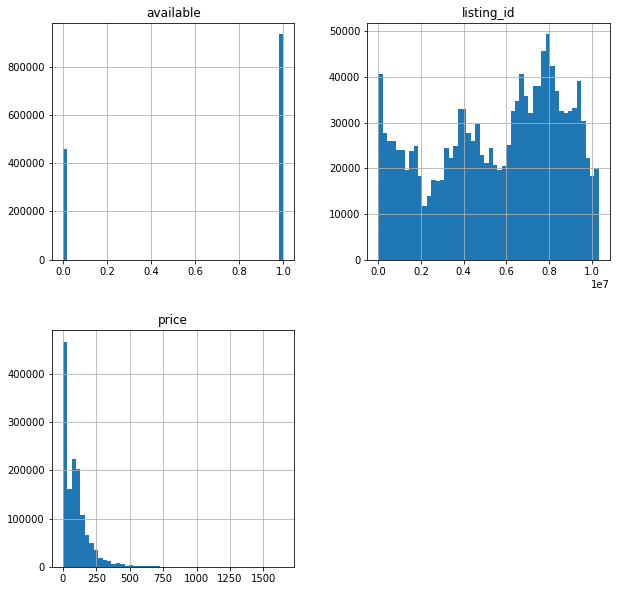

In [67]:
# check numeric columns distribution.
clean_calendar.select_dtypes(exclude=['datetime']).astype(float).hist(bins=50, figsize=(10, 10))
plt.subplots_adjust(hspace=0.3)
plt.show()

### 3.2 Data Preparation for listings dataset
#### 3.2.1 Prepare lists for data clean

In [68]:
# create column handling list based on data assessment. 
# because these original columns shows as other types.
assess_result_l={}
# drop columns in no missing part.
assess_result_l['drop']=['state','smart_location','host_url','listing_url','picture_url','host_verifications',
                         'description','name','city','neighbourhood_cleansed','amenities','street','bed_type',
                         'require_guest_profile_picture','calendar_updated'] 
assess_result_l['datetime']=[]
assess_result_l['bool']=['is_location_exact','require_guest_phone_verification','instant_bookable']
assess_result_l['numeric']=['price','extra_people']
assess_result_l['category']=['neighbourhood_group_cleansed','room_type','cancellation_policy']
# drop columns in imputation part.
assess_result_l['drop'] +=['summary','host_about','last_review','host_picture_url','host_neighbourhood',
                                'neighborhood_overview','transit','host_thumbnail_url','host_name','space','xl_picture_url',
                                'first_review','host_location','neighbourhood','host_has_profile_pic']
assess_result_l['bool'] +=['host_is_superhost','host_identity_verified','medium_url','thumbnail_url']
assess_result_l['numeric'] +=['cleaning_fee','host_response_rate','host_since','host_acceptance_rate']
assess_result_l['category'] +=['zipcode','property_type','host_response_time']
#print(assess_result_l)

In [69]:
#adjust dtype columns list based on the assessment result
dtypes_l_dict=adjust_cols_list(listings,assess_result_l,drop_cols_l)


0 datetime columns are following:
 []

46 drop columns are following:
 ['state', 'smart_location', 'host_url', 'listing_url', 'picture_url', 'host_verifications', 'description', 'name', 'city', 'neighbourhood_cleansed', 'amenities', 'street', 'bed_type', 'require_guest_profile_picture', 'calendar_updated', 'summary', 'host_about', 'last_review', 'host_picture_url', 'host_neighbourhood', 'neighborhood_overview', 'transit', 'host_thumbnail_url', 'host_name', 'space', 'xl_picture_url', 'first_review', 'host_location', 'neighbourhood', 'host_has_profile_pic', 'country', 'has_availability', 'notes', 'jurisdiction_names', 'requires_license', 'calendar_last_scraped', 'security_deposit', 'market', 'monthly_price', 'scrape_id', 'weekly_price', 'square_feet', 'experiences_offered', 'license', 'country_code', 'last_scraped']

33 numeric columns are following:
 ['host_acceptance_rate', 'accommodates', 'availability_60', 'cleaning_fee', 'id', 'host_response_rate', 'review_scores_value', 'guests_in

##### 3.2.1.1 drop columns or rows

In [70]:
#clean the drop columns or rows
if len(assess_result_l['drop']) > 0:
    clean_listings_cols = minus_cols_list(all_cols_l_list,dtypes_l_dict['drop'])
    clean_listings= listings.loc[:,clean_listings_cols]
#get_base_info(clean_listings)

##### 3.2.1.2 handle data type for columns
Check if any columns are of different data types than you would expect ex: 
     - 1) numbers showing as strings
     - 2) String includes invisible char.

In [71]:
# clean special string in numeric columns
# because host_since is a date type, need  convert to numeric. so removed it from numeric columns
obj2num_l_list=minus_cols_list(assess_result_l['numeric'] , ['host_since'])
clean_listings[obj2num_l_list]=del_df_special_char(clean_listings.loc[:,obj2num_l_list],'$,%')

In [72]:
get_base_info(clean_listings[obj2num_l_list])

The dataset contains 3818 rows and 5 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 5 columns):
host_acceptance_rate    3045 non-null object
host_response_rate      3295 non-null object
extra_people            3818 non-null object
cleaning_fee            2788 non-null object
price                   3818 non-null object
dtypes: object(5)
memory usage: 149.2+ KB

Show the dataset example:
  host_acceptance_rate host_response_rate extra_people cleaning_fee   price
0                  100                 96         5.00          NaN   85.00
1                  100                 98         0.00        40.00  150.00
2                  100                 67        25.00       300.00  975.00
3                  NaN                NaN         0.00          NaN  100.00
4                  NaN                100        15.00       125.00  450.00


In [73]:
# clear special char in zipcode column
clean_listings['zipcode']=clean_listings['zipcode'].str.replace('99\n98122','98122')

#### 3.2.3 Select and Re-Encode Features for listings dataset
 - Select and Re-Encode Features
     - Convert columns type to target date type.
     - Re-Encode Categorical Features. Category columns get dummies. Depending on the number of categories, perform one of the following:
       - binary (two-level) categoricals with numeric values: do nothing.
       - binary variable with non-numeric values: re-encode the values as numbers or create a dummy variable.
       - Multi-level categoricals (three or more values): encode the values using multiple dummy variables or just drop them from the analysis. As always, document the choices in the Discussion section.
     - Engineer Mixed-Type Features
       - There are a handful of features that are marked as "mixed" columns in the dataset that require special treatment in order to be included in the analysis.
     - Complete Feature Selection.   To summarize, the dataframe should consist of the following:
       - All numeric, interval, and ordinal type columns from the original dataset.
       - Binary categorical features (all numerically-encoded).
       - Engineered features from other multi-level categorical features and mixed features.

##### 3.2.3.1 Convert columns type to target date type.

###### handle 33 numeric columns :
 ['price', 'id', 'guests_included', 'accommodates', 'bathrooms', 'calculated_host_listings_count', 'host_acceptance_rate', 'review_scores_communication', 'cleaning_fee', 'availability_30', 'review_scores_cleanliness', 'review_scores_accuracy', 'reviews_per_month', 'review_scores_checkin', 'longitude', 'minimum_nights', 'review_scores_value', 'availability_365', 'bedrooms', 'latitude', 'host_response_rate', 'host_id', 'beds', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'extra_people', 'host_since', 'availability_90', 'host_listings_count', 'host_total_listings_count', 'review_scores_location', 'availability_60']

   - 'host_response_rate','host_acceptance_rate' are numeric type and need to be imputed.
   - 'cleaning_fee' is numeric type and need to be imputed as most frequent value.
   - 'host_since' are numeric type and can be converted to years since beginning.


In [74]:
# convert date to datetime based on assesssment result.
#Convert object to numeric.
obj2num_list_l=clean_listings[dtypes_l_dict['numeric']].select_dtypes(include=['object'])
print(obj2num_list_l.head())
print("\nassess numeric columnas result:\n {}".format(assess_result_l['numeric']))
print("\nAll numeric columns result:\n {}".format(dtypes_l_dict['numeric']))

  host_acceptance_rate cleaning_fee host_response_rate  host_since  \
0                  100          NaN                 96  2011-08-11   
1                  100        40.00                 98  2013-02-21   
2                  100       300.00                 67  2014-06-12   
3                  NaN          NaN                NaN  2013-11-06   
4                  NaN       125.00                100  2011-11-29   

  extra_people   price  
0         5.00   85.00  
1         0.00  150.00  
2        25.00  975.00  
3         0.00  100.00  
4        15.00  450.00  

assess numeric columnas result:
 ['price', 'extra_people', 'cleaning_fee', 'host_response_rate', 'host_since', 'host_acceptance_rate']

All numeric columns result:
 ['host_acceptance_rate', 'accommodates', 'availability_60', 'cleaning_fee', 'id', 'host_response_rate', 'review_scores_value', 'guests_included', 'host_since', 'latitude', 'host_listings_count', 'availability_365', 'host_total_listings_count', 'maximum_nights', '

In [75]:
current_date=datetime(2017,1,2)
detal_days=lambda x: (current_date-x).days
clean_listings['host_since']=pd.to_datetime(clean_listings['host_since']).apply(detal_days)

In [76]:
print("Is there any missing value in the column? {}".format(clean_listings['host_since'].isnull().sum()))

Is there any missing value in the column? 2


In [77]:
clean_listings[assess_result_l['numeric']]=clean_listings[assess_result_l['numeric']].astype(float)
get_base_info(clean_listings[assess_result_l['numeric']])

The dataset contains 3818 rows and 6 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 6 columns):
price                   3818 non-null float64
extra_people            3818 non-null float64
cleaning_fee            2788 non-null float64
host_response_rate      3295 non-null float64
host_since              3816 non-null float64
host_acceptance_rate    3045 non-null float64
dtypes: float64(6)
memory usage: 179.0 KB

Show the dataset example:
   price  extra_people  cleaning_fee  host_response_rate  host_since  \
0   85.0           5.0           NaN                96.0      1971.0   
1  150.0           0.0          40.0                98.0      1411.0   
2  975.0          25.0         300.0                67.0       935.0   
3  100.0           0.0           NaN                 NaN      1153.0   
4  450.0          15.0         125.0               100.0      1861.0   

   host_acceptance_rate  
0                 100.0  
1                 

##### 3.2.3.2 Re-Encode Categorical Features

##### handle bool columns:
 ['medium_url','thumbnail_url' , 'host_is_superhost', 'instant_bookable', 'is_location_exact', 'require_guest_phone_verification', 'host_identity_verified']
   - 'medium_url','thumbnail_url' are category type and can be converted to  1 if value exit, or 0. it means airbnb are linked to social medium.
   - 'is_location_exact','require_guest_phone_verification','instant_bookable' are bool type and need imputation.
   - 'host_is_superhost','host_identity_verified' are bool type and need to be	imputed.


In [78]:
# binary variable with non-numeric values:
#convert 'medium_url','thumbnail_url'  column to binary category
clean_listings[['medium_url','thumbnail_url']]=clean_listings[['medium_url','thumbnail_url']].notnull()

The number of missing value of host_identity_verified columns is:2 
The host_identity_verified columns type is:object 
    index host_identity_verified
0   count                   3816
1  unique                      2
2     top                      t
3    freq                   2997
0       t               0.784966
1       f                0.21451
0       t               0.784966
1       f                0.21451
The number of missing value of is_location_exact columns is:0 
The is_location_exact columns type is:object 
    index is_location_exact
0   count              3818
1  unique                 2
2     top                 t
3    freq              3412
0       t          0.893662
1       f          0.106338
0       t          0.893662
1       f          0.106338
The number of missing value of host_is_superhost columns is:2 
The host_is_superhost columns type is:object 
    index host_is_superhost
0   count              3816
1  unique                 2
2     top                 f
3 

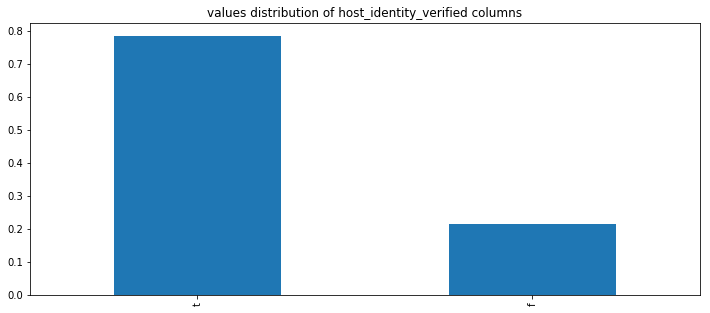

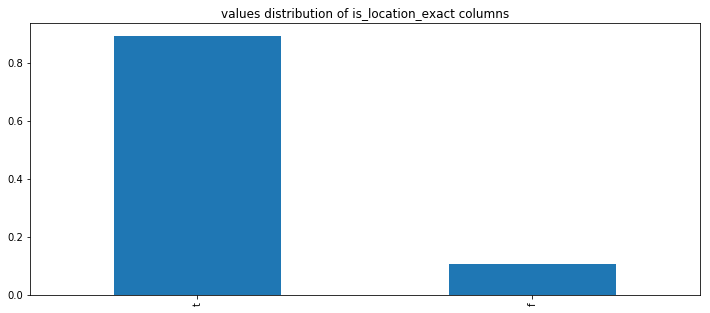

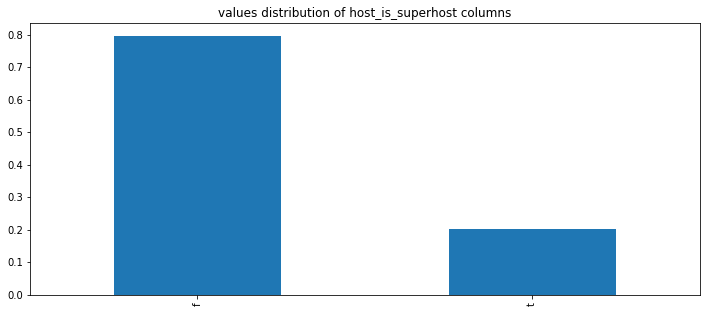

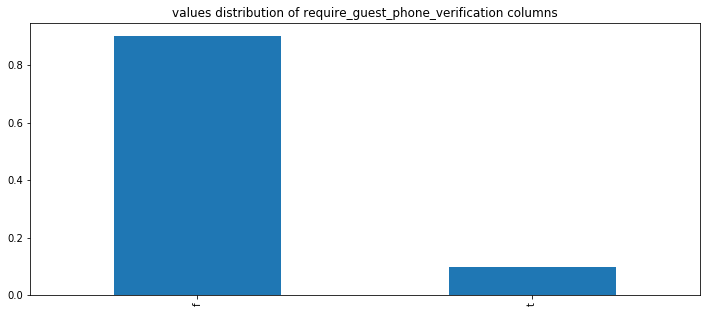

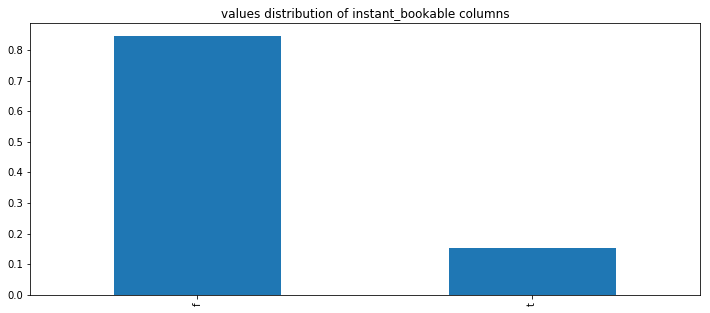

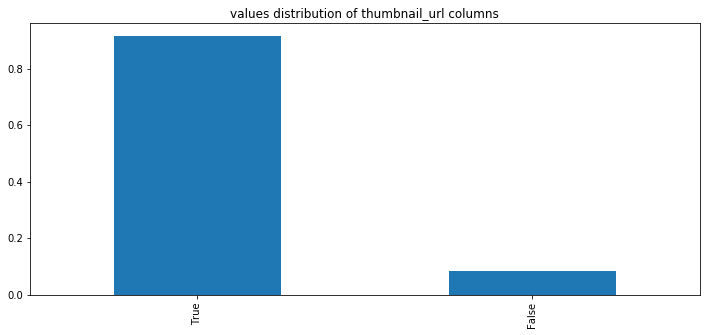

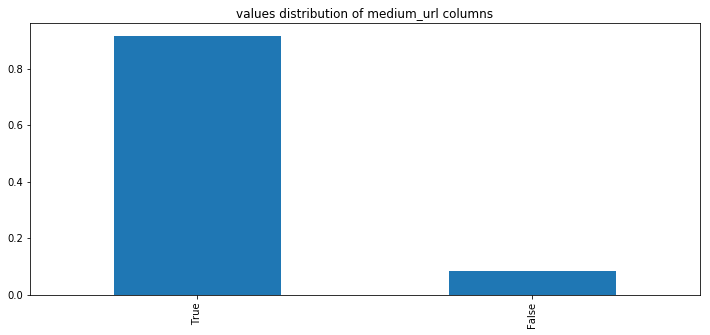

In [79]:
# check column value distribution.
for col in  dtypes_l_dict['bool']:
    col_desc=assess_nonnumeric(clean_listings,col)
    print(col_desc)

In [80]:
# binary variable with non-numeric values:convert available column to binary category
# clean_listings[bool_cols_l ]=clean_listings[bool_cols_l].applymap(mapping.get)
# clean bool columns. t=True, f=False
mapping={'t':True,'f':False}
for col in minus_cols_list(dtypes_l_dict['bool'],['medium_url','thumbnail_url']):
    clean_listings[col]=clean_listings[col].map(mapping)


In [81]:
clean_listings[assess_result_l['bool']]=clean_listings[assess_result_l['bool']].astype(bool)
clean_listings[assess_result_l['bool']].head()

,is_location_exact,require_guest_phone_verification,instant_bookable,host_is_superhost,host_identity_verified,medium_url,thumbnail_url
0,True,False,False,False,True,False,False
1,True,True,False,True,True,True,True
2,True,False,False,False,True,False,False
3,True,False,False,False,True,False,False
4,True,False,False,False,True,False,False


##### handle 8 category columns :
 ['cancellation_policy', 'zipcode', 'property_type', 'host_response_time', 'neighbourhood_group_cleansed', 'thumbnail_url', 'medium_url', 'room_type']
   - 'host_response_time' is category type and need to be	imputed.
   - 'neighbourhood_group_cleansed',	'room_type','cancellation_policy' are string/category type and need be converted to  dummies variable.
   - 'zipcode','property_type','host_response_time' are category type  and need to be	imputed. zipcode has invisible char and can be corrected. And proper_type has incorrect value(e.g. Bed & Breakfast), but the ratio is small and can be ignored.
   

In [82]:
clean_listings[dtypes_l_dict['category']].head()

,cancellation_policy,neighbourhood_group_cleansed,room_type,host_response_time,property_type,zipcode
0,moderate,Queen Anne,Entire home/apt,within a few hours,Apartment,98119
1,strict,Queen Anne,Entire home/apt,within an hour,Apartment,98119
2,strict,Queen Anne,Entire home/apt,within a few hours,House,98119
3,flexible,Queen Anne,Entire home/apt,NaN,Apartment,98119
4,strict,Queen Anne,Entire home/apt,within an hour,House,98119


In [83]:
clean_listings_dummy=pd.get_dummies(clean_listings[dtypes_l_dict['category']],dummy_na=True )

In [84]:
# remove oringal category columns 
clean_listings.drop(dtypes_l_dict['category'],inplace=True,axis=1)
# add category dummies
clean_listings = pd.concat([clean_listings,clean_listings_dummy],axis=1)
clean_listings.columns

Index(['host_acceptance_rate', 'host_identity_verified', 'is_location_exact',
       'host_is_superhost', 'availability_60', 'accommodates', 'cleaning_fee',
       'id', 'host_response_rate', 'require_guest_phone_verification',
       ...
       'zipcode_98126', 'zipcode_98133', 'zipcode_98134', 'zipcode_98136',
       'zipcode_98144', 'zipcode_98146', 'zipcode_98177', 'zipcode_98178',
       'zipcode_98199', 'zipcode_nan'],
      dtype='object', length=116)

##### 3.2.3.3 Engineer Mixed-Type Features

In [85]:
#No Mixed-Type columns

#### 3.2.3.4 Complete Feature Selection
To summarize, the dataframe should consist of the following:
 - All numeric, interval, and ordinal type columns from the original dataset.
 - Binary categorical features (all numerically-encoded).
 - Engineered features from other multi-level categorical features and mixed features.
 

In [86]:
get_base_info(clean_listings)

The dataset contains 3818 rows and 116 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Columns: 116 entries, host_acceptance_rate to zipcode_nan
dtypes: bool(7), float64(21), int64(12), uint8(76)
memory usage: 1.3 MB

colum number is too large. Transpose the columns to show 3 rows
116
                                                        0        1         2
host_acceptance_rate                                  100      100       100
host_identity_verified                               True     True      True
is_location_exact                                    True     True      True
host_is_superhost                                   False     True     False
availability_60                                        41       13         6
accommodates                                            4        4        11
cleaning_fee                                          NaN       40       300
id                                                 241032   953

#### 3.2.4 Feature transforming

  - imputation columns
         1. use mean, mode, averge as imputation value.
         2. use ML prediction value as imputation value.
  - Make columns type clean that only inlcude basic type: int, float, string,list, dict, set.
  - Apply Feature Scaling
    - Normalize
    - Standardize

##### 3.2.4.1  imputation columns
   1. use mean, mode, averge as imputation value.
   2. or use ML prediction value as imputation value.
 

In [87]:
from sklearn.preprocessing import Imputer

In [88]:
# impute missing value of cleaning_fee column with most frequent value
cleaning_fee_mode= clean_listings['cleaning_fee'].mode().values[0]
clean_listings['cleaning_fee'].fillna(cleaning_fee_mode, inplace=True)
clean_listings['cleaning_fee'].isnull().sum()

0

In [89]:
# impute missing value of bool column with most frequent value
for col in dtypes_l_dict['bool']:
    bool_mode = clean_listings[col].mode().values[0]
    clean_listings[col].fillna(bool_mode, inplace=True)

In [90]:
# impute numeric column.
from sklearn.preprocessing import Imputer
before_imp_num_df=clean_listings[dtypes_l_dict['numeric']]
num_imp = Imputer(missing_values=np.nan, strategy='median', axis=0)
np_num_imp=num_imp.fit_transform(before_imp_num_df.astype(np.float))
clean_listings_imp_num=pd.DataFrame(np_num_imp, columns=before_imp_num_df.columns)

In [91]:
# remove oringal numeric columns 
clean_listings.drop(dtypes_l_dict['numeric'],inplace=True,axis=1)
# add numeric dummies
clean_listings = pd.concat([clean_listings,clean_listings_imp_num],axis=1)

In [92]:
sorted(clean_listings.columns.values.tolist())

['accommodates',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'bathrooms',
 'bedrooms',
 'beds',
 'calculated_host_listings_count',
 'cancellation_policy_flexible',
 'cancellation_policy_moderate',
 'cancellation_policy_nan',
 'cancellation_policy_strict',
 'cleaning_fee',
 'extra_people',
 'guests_included',
 'host_acceptance_rate',
 'host_id',
 'host_identity_verified',
 'host_is_superhost',
 'host_listings_count',
 'host_response_rate',
 'host_response_time_a few days or more',
 'host_response_time_nan',
 'host_response_time_within a day',
 'host_response_time_within a few hours',
 'host_response_time_within an hour',
 'host_since',
 'host_total_listings_count',
 'id',
 'instant_bookable',
 'is_location_exact',
 'latitude',
 'longitude',
 'maximum_nights',
 'medium_url',
 'minimum_nights',
 'neighbourhood_group_cleansed_Ballard',
 'neighbourhood_group_cleansed_Beacon Hill',
 'neighbourhood_group_cleansed_Capitol Hill',
 'neighbourhood_group_clean

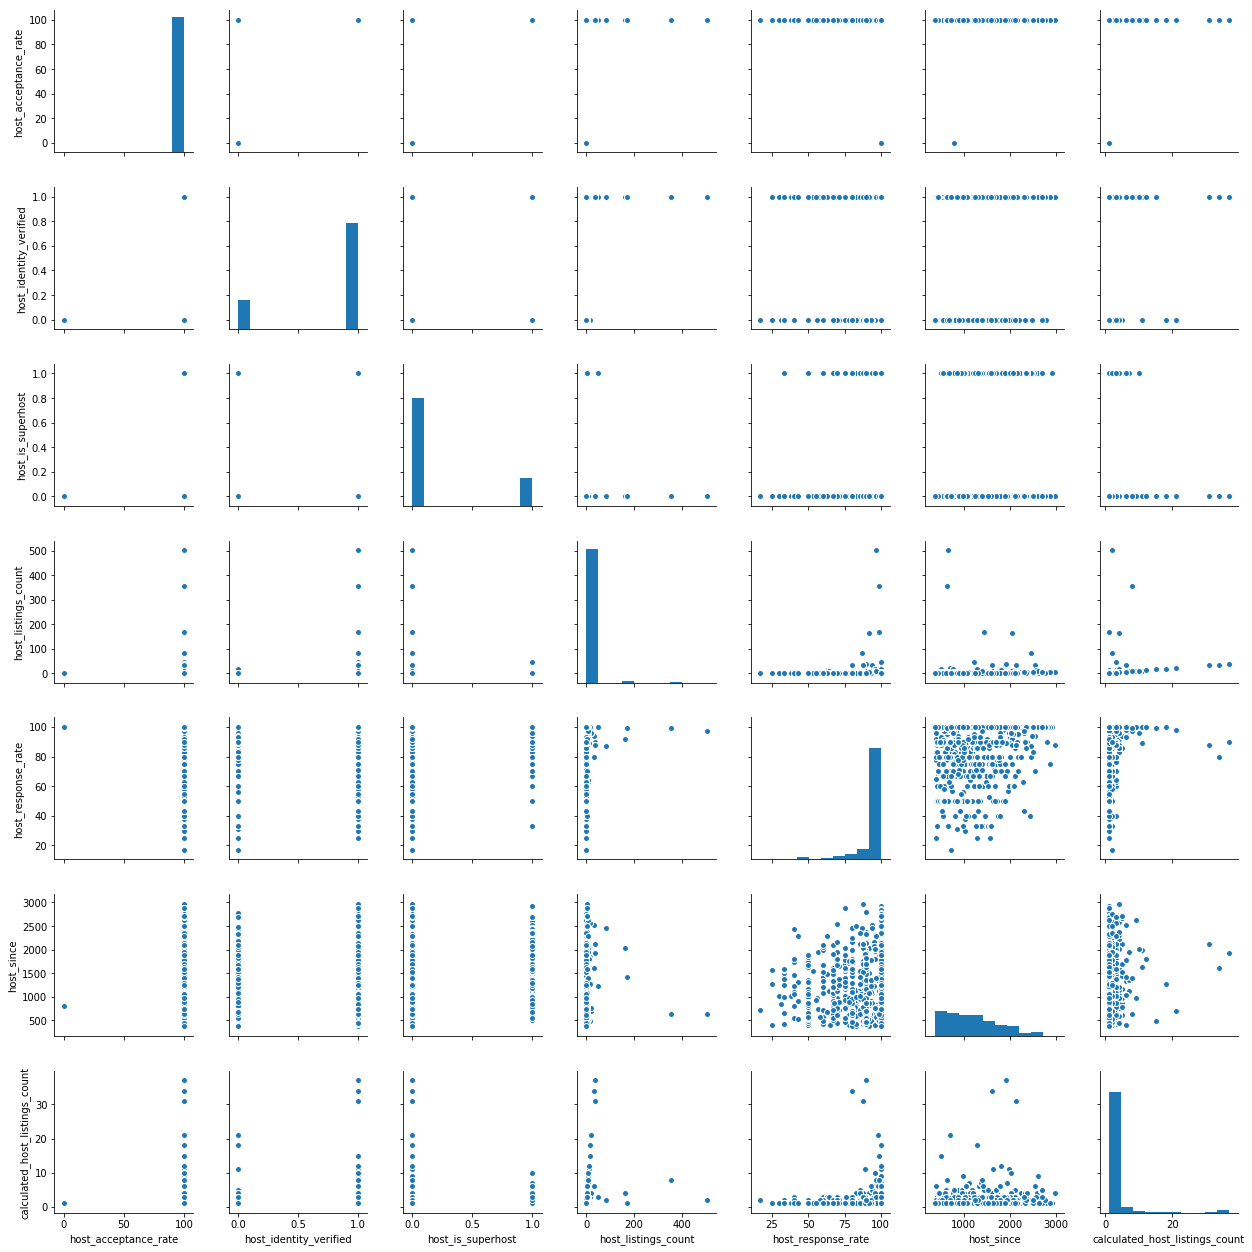

In [93]:
host_info_list= ['host_acceptance_rate',
 'host_identity_verified',
 'host_is_superhost',
 'host_listings_count',
 'host_response_rate',
 'host_since',
 'calculated_host_listings_count']
clean_listings_num_host= clean_listings[host_info_list]
sns.pairplot(clean_listings_num_host);

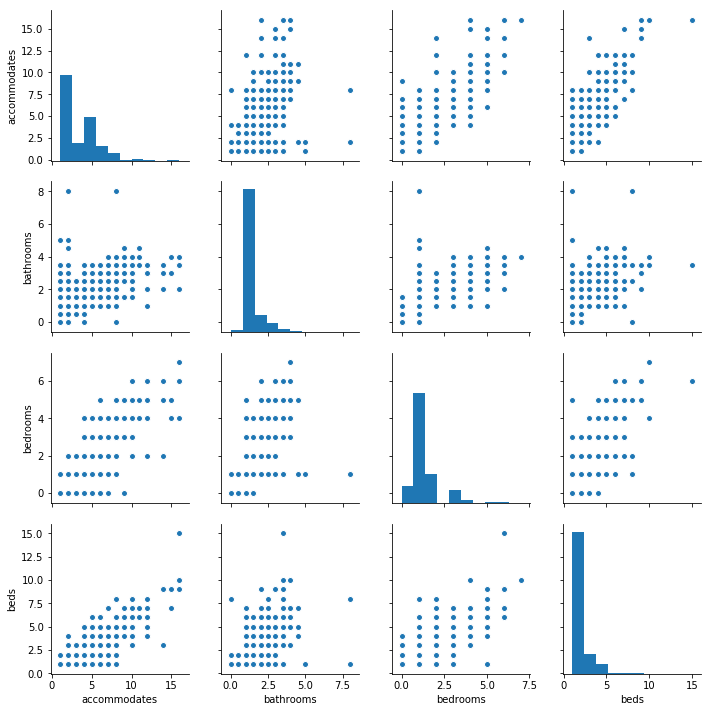

In [94]:
room_info_list=['accommodates',
 'bathrooms',
 'bedrooms',
 'beds' ]
sns.pairplot(clean_listings[room_info_list]);

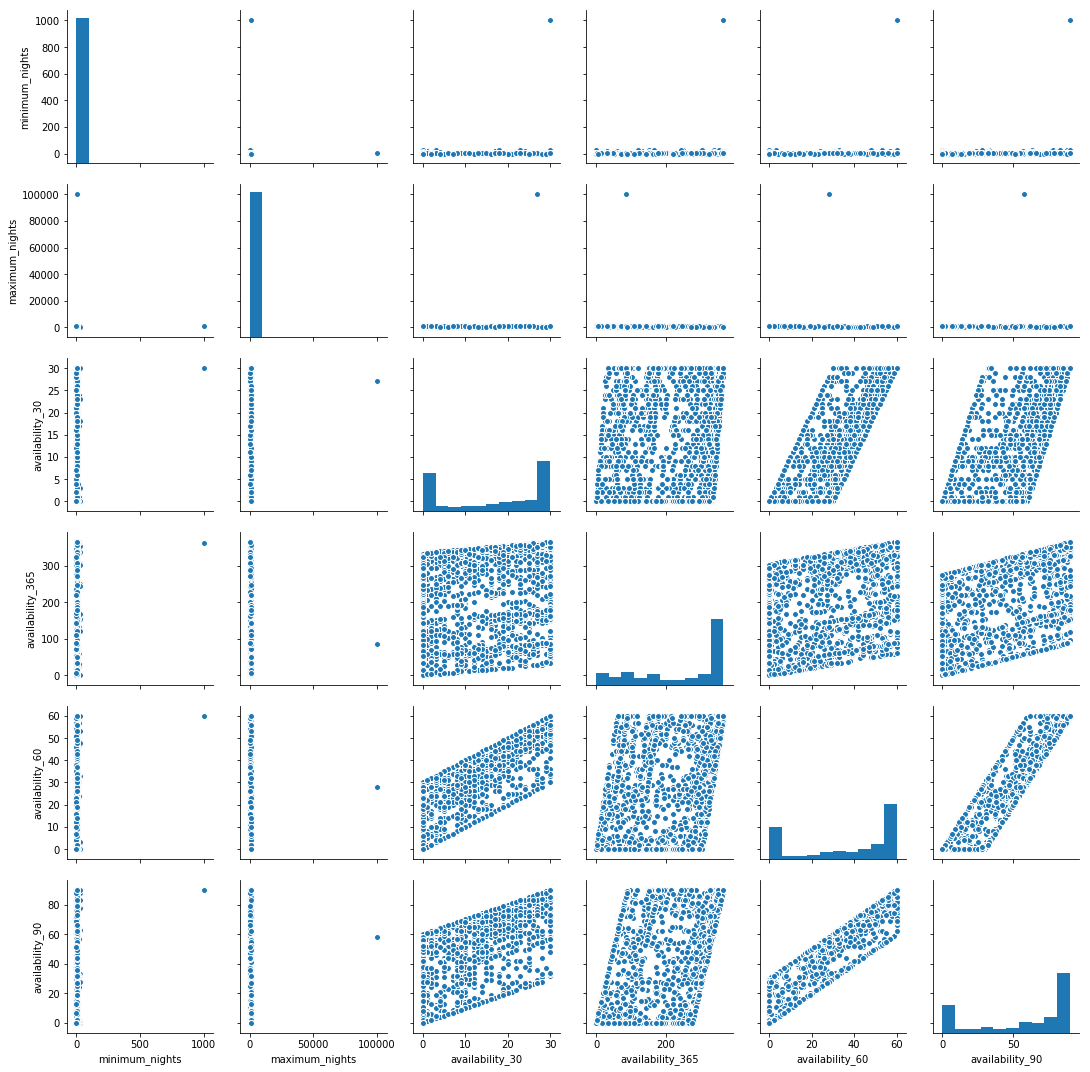

In [95]:
avail_info_list=[
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90']
sns.pairplot(clean_listings[avail_info_list]);

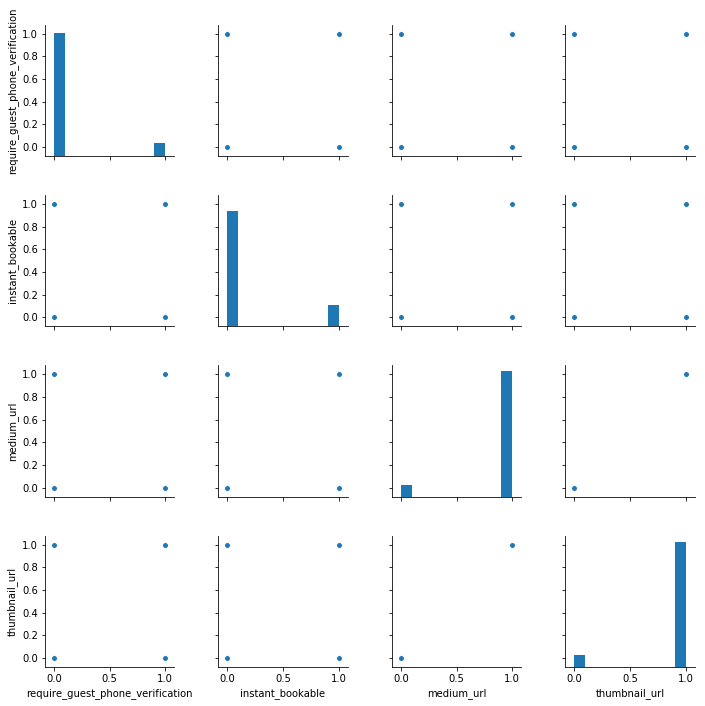

In [96]:
sns.pairplot(clean_listings[ [ 'require_guest_phone_verification','instant_bookable','medium_url', 'thumbnail_url']]);

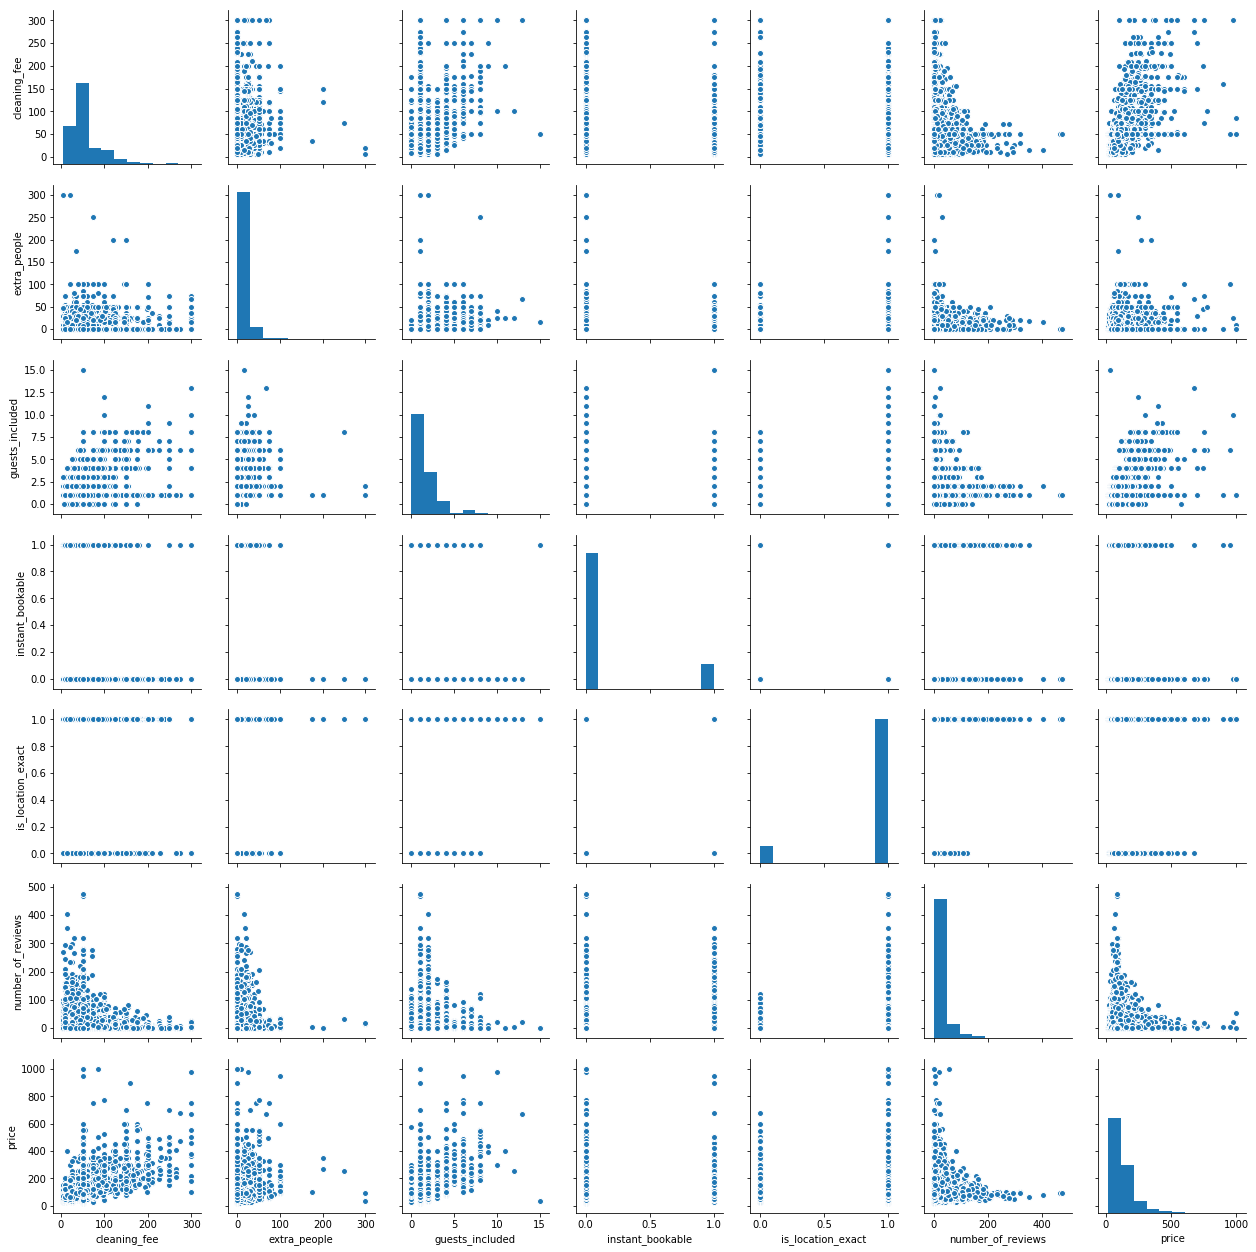

In [97]:
sales_info_list=['cleaning_fee',
 'extra_people',
 'guests_included',
 'instant_bookable',
 'is_location_exact',
 'number_of_reviews',
 'price' ]
sns.pairplot(clean_listings[sales_info_list]);    


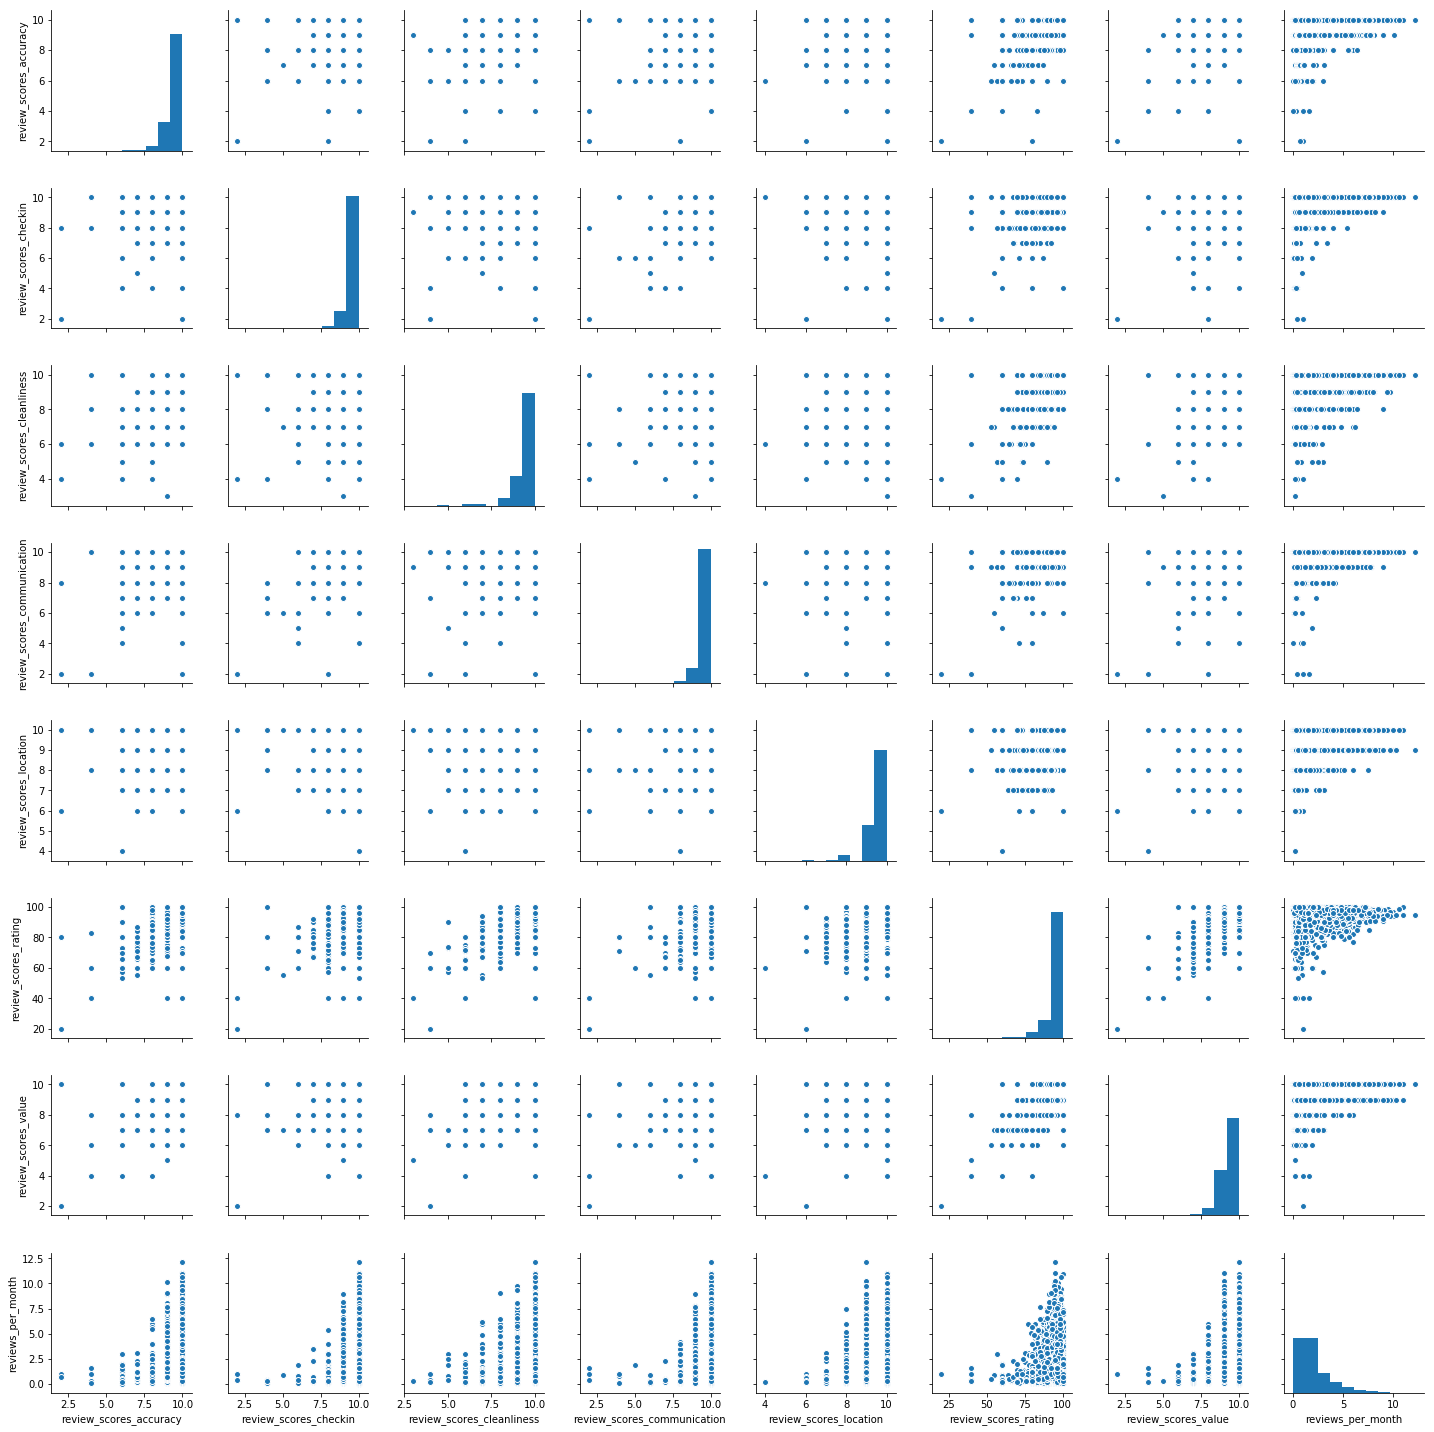

In [98]:
review_info_list=['review_scores_accuracy',
 'review_scores_checkin',
 'review_scores_cleanliness',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_rating',
 'review_scores_value',
 'reviews_per_month']
sns.pairplot(clean_listings[review_info_list]);   

price                        1.000000
accommodates                 0.652218
bedrooms                     0.627624
cleaning_fee                 0.598812
beds                         0.588989
bathrooms                    0.516009
guests_included              0.392875
extra_people                 0.127961
host_total_listings_count    0.093879
host_listings_count          0.093879
Name: price, dtype: float64
review_scores_rating           1.000000
review_scores_value            0.688755
review_scores_cleanliness      0.642736
review_scores_accuracy         0.621557
review_scores_communication    0.545142
review_scores_checkin          0.525589
review_scores_location         0.377089
host_response_rate             0.126267
reviews_per_month              0.074206
id                             0.069750
Name: review_scores_rating, dtype: float64


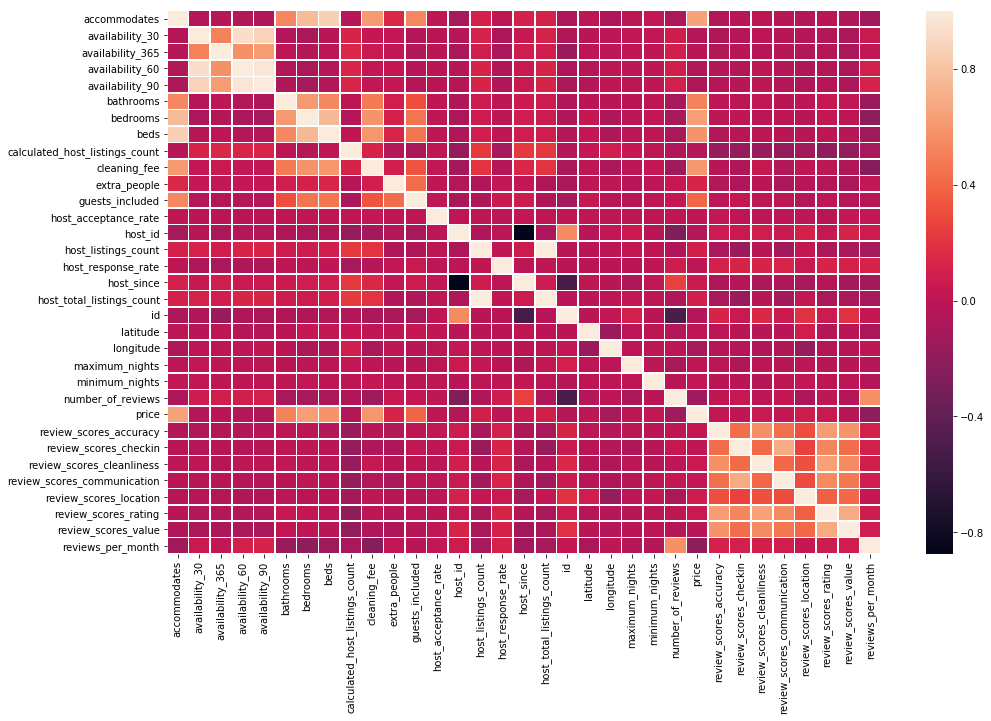

In [137]:
#Correlation Matrix
fig, ax = plt.subplots(figsize=(16,10))
corr = clean_listings[sorted(dtypes_l_dict['numeric'])].corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, linewidths=.5, ax=ax)
print(corr['price'].sort_values(ascending=False)[:10])
print(corr['review_scores_rating'].sort_values(ascending=False)[:10])

- the ratings subscore tend to correlate with the overall rating, and the biggest correlates except rating so far with review_score_rating appear to be:
  - host_response_rate
- Location ratings doesn't really seem to factor into the overall rating
- Price/Cleaning fee look like they're greatly influenced by size elements (bathrooms, beds, guests, etc.)
- avaiability 30,60,90,365 are highly correlation.

In [99]:
#Make columns type clean that only inlcude basic type
get_base_info(clean_listings)

The dataset contains 3818 rows and 116 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Columns: 116 entries, host_identity_verified to longitude
dtypes: bool(7), float64(33), uint8(76)
memory usage: 1.3 MB

colum number is too large. Transpose the columns to show 3 rows
116
                                                        0            1  \
host_identity_verified                               True         True   
is_location_exact                                    True         True   
host_is_superhost                                   False         True   
require_guest_phone_verification                    False         True   
instant_bookable                                    False        False   
thumbnail_url                                       False         True   
medium_url                                          False         True   
cancellation_policy_flexible                            0            0   
cancellation_policy_mode

### 3.3 Data Preparation for reviews dataset
#### 3.3.1 Prepare lists for data clean

##### Conclusion for review dataset
The dataset contains 84849 rows and 6 columns.
- 5 no missing columns are following:
  - 'listing_id', 'id',  'reviewer_id' are numeric columns. and they are already numeric column.
  - 'date' column should be converted to datetime type.
  - 'reviewer_name' column provides duplicated information and reviewer_id can replace it.
- 1 imputing columns are 'comments'. but missing value in comment cannot be imputed. but we can count it as occupation rate. so it can convert to bool type.

In [100]:
# create column handling list based on data assessment. 
# because these original columns shows as other types.
assess_result_r={}
# drop columns in no missing part.
assess_result_r['drop']=['reviewer_name' ] 
assess_result_r['datetime']=['date']
assess_result_r['bool']=['comments']
assess_result_r['numeric']=[]
assess_result_r['category']=[]

In [101]:
#adjust dtype columns list based on the assessment result
dtypes_r_dict=adjust_cols_list(reviews,assess_result_r,drop_cols_r)


1 datetime columns are following:
 ['date']

1 drop columns are following:
 ['reviewer_name']

3 numeric columns are following:
 ['reviewer_id', 'id', 'listing_id']

0 category columns are following:
 []

1 bool columns are following:
 ['comments']


#### 3.3.2 data clean for reviews dataset
  - drop columns or rows
  - verify data type for columns. Check if any columns are of different data types than you would expect ex: 
     - 1) numbers showing as strings
     - 2) String includes invisible char.
     
##### 3.3.2.1 drop columns or rows


In [102]:
#remove drop colums from all columns and select them to clean dataset.
clean_reviews_cols = minus_cols_list(all_cols_r_list,dtypes_r_dict['drop'])
clean_reviews=reviews[clean_reviews_cols]

In [103]:
get_base_info(clean_reviews)

The dataset contains 84849 rows and 5 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 5 columns):
date           84849 non-null object
reviewer_id    84849 non-null int64
id             84849 non-null int64
listing_id     84849 non-null int64
comments       84832 non-null object
dtypes: int64(3), object(2)
memory usage: 3.2+ MB

Show the dataset example:
         date  reviewer_id        id  listing_id  \
0  2015-07-19     28943674  38917982     7202016   
1  2015-07-20     32440555  39087409     7202016   
2  2015-07-26     37722850  39820030     7202016   
3  2015-08-02     33671805  40813543     7202016   
4  2015-08-10     34959538  41986501     7202016   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a very central locat...  
2  Very spacious apartment, and in a great neighb...  
3  Close to Seattle Center and all it has to offe... 

##### 3.3.1.2 handle data type for columns

In [104]:
#numbers showing as strings
# No numeric columns need to be handled.

#### 3.3.3 Select and Re-Encode Features for reviews dataset
       
##### 3.3.3.1 Convert columns type to target date type.

In [105]:
# convert date to datetime based on assesssment result.
for d in assess_result_r['datetime']:
    clean_reviews.loc[:,d] = pd.to_datetime(clean_reviews[d])
clean_reviews[assess_result_r['datetime']].head()

C:\Users\binwan\AppData\Local\Continuum\anaconda3\envs\aind\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,date
0,2015-07-19
1,2015-07-20
2,2015-07-26
3,2015-08-02
4,2015-08-10


In [106]:
clean_reviews[assess_result_r['datetime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 1 columns):
date    84849 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 663.0 KB


##### 3.3.3.2 Re-Encode Categorical Features

In [107]:
# binary variable with non-numeric values:convert available column to binary category

# 1 imputing columns are 'comments'. but missing value in comment cannot be imputed. 
# we can count it as occupation rate. so it can convert to bool type.
clean_reviews[dtypes_r_dict['bool']].info()
clean_reviews_comments=clean_reviews['comments'].notnull()
# remove oringal  columns 
clean_reviews.drop(['comments'],inplace=True,axis=1)
# add new bool columns
clean_reviews = pd.concat([clean_reviews,clean_reviews_comments],axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 1 columns):
comments    84832 non-null object
dtypes: object(1)
memory usage: 663.0+ KB


C:\Users\binwan\AppData\Local\Continuum\anaconda3\envs\aind\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [108]:
clean_reviews[dtypes_r_dict['bool']].head()

,comments
0,True
1,True
2,True
3,True
4,True


#### 3.3.4 Feature transforming

  - imputation columns
         1. use mean, mode, averge as imputation value.
         2. use ML prediction value as imputation value.
  - Make columns type clean that only inlcude basic type: int, float, string,list, dict, set.
  - Apply Feature Scaling
    - Normalize
    - Standardize     
##### 3.3.4.1  imputation columns

In [109]:
# No numeric column need to be imputed.

In [110]:
#Make columns type clean that only inlcude basic type
get_base_info(clean_reviews)

The dataset contains 84849 rows and 5 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 5 columns):
date           84849 non-null datetime64[ns]
reviewer_id    84849 non-null int64
id             84849 non-null int64
listing_id     84849 non-null int64
comments       84849 non-null bool
dtypes: bool(1), datetime64[ns](1), int64(3)
memory usage: 2.7 MB

Show the dataset example:
        date  reviewer_id        id  listing_id  comments
0 2015-07-19     28943674  38917982     7202016      True
1 2015-07-20     32440555  39087409     7202016      True
2 2015-07-26     37722850  39820030     7202016      True
3 2015-08-02     33671805  40813543     7202016      True
4 2015-08-10     34959538  41986501     7202016      True


In [111]:
clean_reviews_cols=clean_reviews.columns.values.tolist()
clean_reviews_cols.remove('date')`b
clean_reviews_cols

['reviewer_id', 'id', 'listing_id', 'comments']

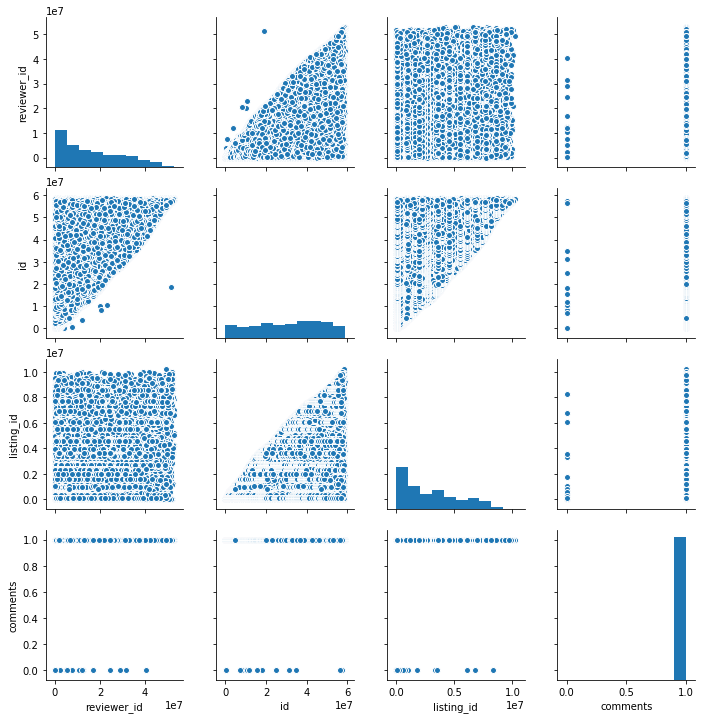

In [112]:
sns.pairplot(clean_reviews[clean_reviews_cols]);   

## Test Area

In [298]:
# Analysis avaiable days and price
occu_calendar = clean_calendar[clean_calendar['date']<=datetime(2016,12,31)].copy()
occu_calendar['month'] = occu_calendar['date'].apply(lambda x: x.month)
occu_calendar.head()

,date,price,listing_id,available,year,month
0,2016-01-04,85.0,241032,True,2016,1
1,2016-01-05,85.0,241032,True,2016,1
2,2016-01-06,0.0,241032,False,2016,1
3,2016-01-07,0.0,241032,False,2016,1
4,2016-01-08,0.0,241032,False,2016,1


In [299]:
occu_group_c=occu_calendar.loc[occu_calendar['available']==True,['price','listing_id','month']].groupby(['listing_id','month'])

In [300]:
clean_calendar.loc[(clean_calendar['available']==True)&(clean_calendar['listing_id']==3335),:].head()

,date,price,listing_id,available,year,month
797216,2016-02-29,120.0,3335,True,2016,2
797217,2016-03-01,120.0,3335,True,2016,3
797218,2016-03-02,120.0,3335,True,2016,3
797219,2016-03-03,120.0,3335,True,2016,3
797220,2016-03-04,120.0,3335,True,2016,3


In [301]:
# calculate available days per month 
avail_count=occu_group_c.size()
mean_price=occu_group_c.price.mean()
group_df=pd.concat([avail_count, mean_price], axis=1)
group_df.rename(columns={0:'avail_days_per_month','price':'month_price'}, inplace = True )
group_df=group_df.reset_index()
group_df.head()

,listing_id,month,avail_days_per_month,month_price
0,3335,2,1,120.0
1,3335,3,31,120.0
2,3335,4,30,120.0
3,3335,5,31,120.0
4,3335,6,30,120.0


In [302]:
gd=group_df.groupby('listing_id')['avail_days_per_month', 'month_price']
group_df['avail_days_per_year']=gd.transform('sum')['avail_days_per_month']
group_df['year_avg_price']=gd.transform('mean')['month_price']
group_df.head()

,listing_id,month,avail_days_per_month,month_price,avail_days_per_year,year_avg_price
0,3335,2,1,120.0,307,120.0
1,3335,3,31,120.0,307,120.0
2,3335,4,30,120.0,307,120.0
3,3335,5,31,120.0,307,120.0
4,3335,6,30,120.0,307,120.0


In [303]:
# Analysis occupation nights and price
occu_listings = clean_listings[['id', 'price', 'cleaning_fee','minimum_nights', 'reviews_per_month']].copy()
occu_listings['total_price']=(occu_listings['price']+occu_listings['cleaning_fee'])
occu_listings['estimate_nights']=occu_listings['minimum_nights']*occu_listings['reviews_per_month']
occu_listings['estimate_incomes']=occu_listings['total_price']*occu_listings['estimate_nights']

In [304]:
occu_listings['total_price']=(occu_listings['price']+occu_listings['cleaning_fee'])

In [305]:
# Get the nights and incomes by years
occu_listings['estimate_nights_per_year']=occu_listings['estimate_nights']*12
occu_listings['estimate_incomes_per_year']=occu_listings['estimate_incomes']*12
occu_listings.head()

,id,price,cleaning_fee,minimum_nights,reviews_per_month,total_price,estimate_nights,estimate_incomes,estimate_nights_per_year,estimate_incomes_per_year
0,241032.0,85.0,50.0,1.0,4.07,135.0,4.07,549.45,48.84,6593.4
1,953595.0,150.0,40.0,2.0,1.48,190.0,2.96,562.40,35.52,6748.8
2,3308979.0,975.0,300.0,4.0,1.15,1275.0,4.60,5865.00,55.20,70380.0
3,7421966.0,100.0,50.0,1.0,1.54,150.0,1.54,231.00,18.48,2772.0
4,278830.0,450.0,125.0,1.0,0.89,575.0,0.89,511.75,10.68,6141.0


In [306]:
group_df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33184 entries, 0 to 33183
Data columns (total 16 columns):
listing_id                   33184 non-null object
month                        33184 non-null int64
avail_days_per_month         33184 non-null int64
month_price                  33184 non-null float64
avail_days_per_year          33184 non-null int64
year_avg_price               33184 non-null float64
id                           33184 non-null float64
price                        33184 non-null float64
cleaning_fee                 33184 non-null float64
minimum_nights               33184 non-null float64
reviews_per_month            33184 non-null float64
total_price                  33184 non-null float64
estimate_nights              33184 non-null float64
estimate_incomes             33184 non-null float64
estimate_nights_per_year     33184 non-null float64
estimate_incomes_per_year    33184 non-null float64
dtypes: float64(12), int64(3), object(1)
memory usage: 4.3+ MB


In [307]:
group_df_tmp=group_df.merge(occu_listings, left_on='listing_id', right_on='id')
select_listings_cols = group_df.columns.values.tolist()
select_listings_cols +=['minimum_nights','reviews_per_month','total_price','estimate_nights','estimate_incomes','estimate_nights_per_year','estimate_incomes_per_year']
group_df = group_df_tmp[select_listings_cols]
group_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33184 entries, 0 to 33183
Data columns (total 13 columns):
listing_id                   33184 non-null object
month                        33184 non-null int64
avail_days_per_month         33184 non-null int64
month_price                  33184 non-null float64
avail_days_per_year          33184 non-null int64
year_avg_price               33184 non-null float64
minimum_nights               33184 non-null float64
reviews_per_month            33184 non-null float64
total_price                  33184 non-null float64
estimate_nights              33184 non-null float64
estimate_incomes             33184 non-null float64
estimate_nights_per_year     33184 non-null float64
estimate_incomes_per_year    33184 non-null float64
dtypes: float64(9), int64(3), object(1)
memory usage: 3.5+ MB


In [308]:
listings['minimum_nights'].value_counts()

1       1610
2       1423
3        480
4        122
5         67
7         50
6         16
14        16
20        11
30         6
10         5
13         2
1000       1
29         1
28         1
26         1
11         1
12         1
8          1
15         1
21         1
31         1
Name: minimum_nights, dtype: int64

In [309]:
group_df.head(10)

,listing_id,month,avail_days_per_month,month_price,avail_days_per_year,year_avg_price,minimum_nights,reviews_per_month,total_price,estimate_nights,estimate_incomes,estimate_nights_per_year,estimate_incomes_per_year
0,3335,2,1,120.0,307,120.0,2.0,1.54,195.0,3.08,600.6,36.96,7207.2
1,3335,3,31,120.0,307,120.0,2.0,1.54,195.0,3.08,600.6,36.96,7207.2
2,3335,4,30,120.0,307,120.0,2.0,1.54,195.0,3.08,600.6,36.96,7207.2
3,3335,5,31,120.0,307,120.0,2.0,1.54,195.0,3.08,600.6,36.96,7207.2
4,3335,6,30,120.0,307,120.0,2.0,1.54,195.0,3.08,600.6,36.96,7207.2
5,3335,7,31,120.0,307,120.0,2.0,1.54,195.0,3.08,600.6,36.96,7207.2
6,3335,8,31,120.0,307,120.0,2.0,1.54,195.0,3.08,600.6,36.96,7207.2
7,3335,9,30,120.0,307,120.0,2.0,1.54,195.0,3.08,600.6,36.96,7207.2
8,3335,10,31,120.0,307,120.0,2.0,1.54,195.0,3.08,600.6,36.96,7207.2
9,3335,11,30,120.0,307,120.0,2.0,1.54,195.0,3.08,600.6,36.96,7207.2


In [310]:
a=group_df['estimate_nights_per_year'].mean()

In [313]:
b=group_df['estimate_incomes_per_year'].mean()

In [314]:
b/a`

177.84699757466691

In [324]:
group_df['reviews_per_month'].mean()

2.0317867044358726

In [315]:
group_df['minimum_nights'].mean()

2.419599807135969

In [323]:
e=group_df['estimate_nights_per_year']/group_df['avail_days_per_year']
e.mean()

0.22573354051922626

In [224]:
# Analysis reviews days and price
select_date=(clean_reviews['date']>=datetime(2016,1,1))&(clean_reviews['date']<=datetime(2016,12,31))
occu_reviews = clean_reviews[select_date].copy()
occu_reviews['month'] = occu_reviews['date'].apply(lambda x: x.month)
occu_reviews.head()

,date,reviewer_id,id,listing_id,comments,month
15,2016-01-02,41297839,58268184,7202016,True,1
815,2016-01-03,42961746,58698406,6939472,True,1
2166,2016-01-01,35910550,58243150,6228959,True,1
2373,2016-01-02,37185230,58290971,8518308,True,1
2868,2016-01-02,51264572,58404761,2670365,True,1


In [233]:
#occu_group_r=occu_reviews.loc[occu_reviews['comments']==True,['listing_id','month']].groupby(['listing_id','month'])
occu_group_r=occu_reviews.loc[:,['listing_id','month']].groupby(['listing_id','month'])

In [234]:
review_count=occu_group_r.size()
review_count
# it only 217 record, so it may be not used to estimate occupation rate

listing_id  month
43373       1        1
116221      1        1
194313      1        1
217142      1        1
241032      1        1
279063      1        1
491958      1        1
493591      1        1
544433      1        1
637326      1        1
762029      1        1
769213      1        1
774659      1        1
838764      1        1
856550      1        1
975179      1        1
988176      1        1
1071843     1        1
1171574     1        1
1198799     1        1
1225820     1        1
1349175     1        1
1355094     1        1
1562643     1        1
1633986     1        1
1732441     1        1
1802663     1        1
1857141     1        1
2197168     1        1
2211594     1        1
                    ..
9068419     1        1
9075656     1        2
9137469     1        1
9218403     1        1
9263252     1        1
9281758     1        1
9298045     1        1
9328278     1        1
9426058     1        1
9473312     1        1
9489310     1        1
9494623     1   

In [ ]:
# calculate reviews days per month 
review_count=occu_group_r.size()
group_df=pd.concat([avail_count, mean_price], axis=1)
group_df.rename(columns={0:'avail_days_per_month','price':'month_price'}, inplace = True )
group_df=group_df.reset_index()
group_df.head(30)
group_df.info()

In [223]:
clean_reviews['date'].describe()

count                   84849
unique                   1930
top       2015-09-21 00:00:00
freq                      580
first     2009-06-07 00:00:00
last      2016-01-03 00:00:00
Name: date, dtype: object

In [217]:
clean_calendar.head(10)

,date,price,listing_id,available,year,month
0,2016-01-04,85.0,241032,True,2016,1
1,2016-01-05,85.0,241032,True,2016,1
2,2016-01-06,0.0,241032,False,2016,1
3,2016-01-07,0.0,241032,False,2016,1
4,2016-01-08,0.0,241032,False,2016,1
5,2016-01-09,0.0,241032,False,2016,1
6,2016-01-10,0.0,241032,False,2016,1
7,2016-01-11,0.0,241032,False,2016,1
8,2016-01-12,0.0,241032,False,2016,1
9,2016-01-13,85.0,241032,True,2016,1


In [143]:
clean_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Columns: 116 entries, host_identity_verified to longitude
dtypes: bool(7), float64(33), uint8(76)
memory usage: 1.3 MB


In [144]:
clean_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 5 columns):
date           84849 non-null datetime64[ns]
reviewer_id    84849 non-null int64
id             84849 non-null int64
listing_id     84849 non-null int64
comments       84849 non-null bool
dtypes: bool(1), datetime64[ns](1), int64(3)
memory usage: 2.7 MB


In [200]:
#clean_reviews.columns
#['date', 'price', 'listing_id', 'available']
occu_reviews = clean_reviews[clean_reviews['date']<=datetime(2016,12,31)].copy()
occu_reviews['month'] = occu_reviews['date'].apply(lambda x: x.month)
occu_reviews.head()

,date,reviewer_id,id,listing_id,comments,month
0,2015-07-19,28943674,38917982,7202016,True,7
1,2015-07-20,32440555,39087409,7202016,True,7
2,2015-07-26,37722850,39820030,7202016,True,7
3,2015-08-02,33671805,40813543,7202016,True,8
4,2015-08-10,34959538,41986501,7202016,True,8


### Clean Calendar dataset

In [ ]:
calendar.loc[calendar['price'].isnull(), ['available','price']].groupby(['available']).count()

Based on above result, missing price rooms are all unavailble.

In [ ]:
#calendar_clean=calendar.loc[calendar['price'].notnull(),:].copy()

In [ ]:
# Get the data type of listings
print(listings.info())
# analyze missing data rate for columns in listings
listings_missing_rate=listings.isnull().mean()*100
print(listings_missing_rate)
# Get the listings example
listings.head()

In [ ]:
# Get the data type of reviews
print(reviews.info())
# analyze missing data rate for columns in reviews
reviews_missing_rate=reviews.isnull().mean()*100
print(reviews_missing_rate)
# Get the listings example
reviews.head()

In [ ]:
# Check missing data in row distribution 
reviews_missing_row=reviews.isnull().mean(axis=1)*100
bins=[0,5,10,15,20,25,30,40,50,60,80,100]
reviews_missing_row_cuts=pd.cut(reviews_missing_row,bins)
pd.value_counts(reviews_missing_row_cuts, sort=False).plot('bar')